# Perceptrons

# Background

The _perceptron_ is the computational element from which most  modern neural networks are built.

This figure (from Simplilearn) is a good depiction (although $m$ should be $n$ in the two bottom-most circles, to be compatible with our notation).

 ![image](https://www.simplilearn.com/ice9/free_resources_article_thumb/Perceptron/general-diagram-of-perceptron-for-supervised-learning_4.jpg)

The output (we'll call it $\hat{y}$) is defined as

$\hat{y} = h_{\bf w}({\bf w} \cdot {\bf x}_h)$

Where

+ ${\bf x}_h = [ x_0,  x_1, \ldots x_n ]$ is an $(n+1)$ dimensional vector with $x_0=1$ always. $x_1$ through $x_n$ is the input $n$-dimensional pattern.
+ ${\bf w} = [w_0, w_1, \ldots w_n]$ is an $(n+1)$-dimensional _weight vector_;  $w_0$ is called the _bias_.
+ The _net input function_ is the simple dot product.  This is where the weird $x_0=1$ and bias $w_0$ terms are justified -- $w_0$ is added to the dot product of $[x_1, \ldots x_n]$ and $[w_1, \ldots w_n]$, but as part of a dot product with an additional term rather than as a separate step. This simple optimization can save an amazing amount of computation time on dedicated hardware.
+ The _activation function_ $h_{\bf w}()$ that operates on the (scalar) result of the net input function (dot product). For the perceptron, $h_{\bf w}$ is usually a step function with the step at the origin. Newer neural nets often use cool smooth functions that look similar to a step function but are differentiable everywhere.

If you assume that

\begin{align}
h_{\bf w}(x) = \left\{ \begin{array}{cl}1 & x>0 \\ 0 & x\le 0 \end{array} \right.
\end{align}

then you can interpret this perceptron as a classifier. You give it a pattern vector ${\bf x}$ and it will give you a 0 or a 1 -- a class label!  The vector ${\bf w}$ defines a "hyperplane" in the feature space (a line, if the feature space is 2D). ${\bf w}\cdot {\bf x} = 0$ is the _locus_ of feature vectors on the decision boundary.  

What remains is to _train_ the perceptron to produce the _proper_ class values, given training data (and hope that the result is generalizable).  This is classical supervised learning, so we'll need
 + a training data set to learn ${\bf w}$
 + a testing data set to evaluate it
 + a learning algorithm that allows ${\bf w}$ to be learned from examples.

Perceptron training is a process of adjusting the coefficients f ${\bf w}$, making the decision boundary twist and slide, until the boundary separates the classes.

In [ ]:
# import the things
import sys
import os
import numpy as np
import sklearn.datasets
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn.model_selection

## Create some data

 a. Use `sklearn.make_blobs` to create a data set of 500 2-dimensional samples from 2 classes (labels 0 and 1), with accompanying class labels.

 b. Put both the data and the labels in a Pandas dataframe named `df`. The column names for the features should be `x1` and `x2`, and the column name for the labels should be `label`.

 c. Plot `x2` _vs._ `x1` using `sns.scatterplot()` so that the hue of the dots is the `label` number.

 d. Add a new column to `df` named `x0` and containing the constant 1.0 at each row. This is the "extra" (sometimes called "homogeneous") coordinate needed to unify the weights and the bias term in training.

 e. Use `sklearn.model_selection.train_test_split()` to split the data and labels into a training portion (80% of the points and their labels) and a testing portion (the remaining 20% of the points and their labels).  Call the results `X_train`, `X_test`, `y_train`, and `y_test`. The `X` variables are the patterns (three-dimensional!) and the `y` variables are the labels.

In [ ]:
# a. Create a data set of 500 2-dimensional samples from 2 classes
X, y = sklearn.datasets.make_blobs(n_samples=500, centers=2, n_features=2, random_state=42)

# b. Put both the data and the labels in a Pandas dataframe
df = pd.DataFrame(X, columns=['x1', 'x2'])
df['label'] = y

# c. Plot x2 vs. x1
plt.figure()
sns.scatterplot(data=df, x='x1', y='x2', hue='label')
plt.show()

# d. Add a new column to df
df['x0'] = 1.0

# e. Split the data and labels into a training portion and a testing portion
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(df[['x0', 'x1', 'x2']], df['label'], test_size=0.2, random_state=42)


## Perceptron training

Now, you will implement perceptron training.

(At this point, we are working strictly with the $(n+1)$-dimensional versions of the input patterns and an $(n+1)$-dimensional weight vector.)

The code cell below has a free function `plot_decision_boundary(X,y,w,title)` that will plot the decision boundary and the data if you give it the patterns `X`, labels `y`, weight vector `w`, and title for the slide.

In the code cell below, implement the listed functions.

a.  `act(x)` takes a scalar $x$ and returns 1 if $x>0$ and returns 0 otherwise.

b. `perceptron(xh,w, activation_fn = act)` uses `np.dot()` above to compute the output of the perceptron with weight vector `w` when supplied with an input vector `xh`, using the activation function whose name is supplied as a keyword argument.  The default value allows your function to "just work" if `activation` is not specified (assuming you've implemented `act()`).

c. `perceptron_train_epoch(X,y,wh,lr)` runs a single epoch of perceptron training. It should loop over each pattern in `X` and classify it using the perceptron. If the classification is incorrect, the weight vector `wh` should be updated using the perceptron update rule, Eq. 19.8 in R&N (they denote the learning rate as $\alpha$).  This function should return the (possibly updated) weight vector and the number of patterns in X misclassified by the weight vector provided to the function.

d. `perceptron_train(X,y,lr,max_epochs)` will run perceptron training for multiple epochs (by calling `perceptron_train_epoch()` `max_epochs` times or less).
  + It should initialize the initial weight vector ${\bf w}_0$ using `np.random.rand()` to cause each component to be a uniformly-distributed random number between 0.0 and 1.0.
  + It should then call `plot_decision_boundary()` to get an initial rendering of the data and the randomly chosen decision boundary.
  + It should then loop `max_epochs` times, calling `perceptron_train_epoch()` and examining the result `n_miss`. If `n_miss` is zero, training is finished; break out of the loop.  If not, run it again. If `max_epochs` is large enough and the classes are linearly separable, the algorithm will eventually converge.  Your function should return a list of missclassification counts for each iteration along with the final weight vector obtained at convergence or when you run out of iterations. It should also call `plot_decision_boundary()` to render the (possibly updated) decision boundary.

In [1]:
def plot_decision_boundary(X, y, w, title):
  """ plot decision boundary. X = data (zeroth coordinate is homogeneous, ignore), w = weight vector. """
  x1 = np.array([np.min(X['x1']), np.max(X['x1'])])
  m = -w[1]/w[2] # find slope and intercept for plotting, ick!
  c = -w[0]/w[2]
  #print(f'x1 {x1} m {m} c {c}')
  x2 = m*x1 + c
  # Plotting
  dx = x1[1]-x1[0]
  dy = np.max(X['x2'])-np.min(X['x2'])
  plt.xlim(x1[0]-0.05*dx,x1[1]+0.05*dx)
  plt.ylim(np.min(X['x2'])-0.05*dy,np.max(X['x2'])+0.05*dy)
  plt.plot(X['x1'][y==0], X['x2'][y==0], "r.")
  plt.plot(X['x1'][y==1], X['x2'][y==1], "b.")
  plt.xlabel("x_1")
  plt.ylabel("x_2")
  plt.title(title)
  plt.plot(x1, x2, 'y-')


# a. Activation function
def act(x):
    return 1 if x > 0 else 0

# b. Perceptron function
def perceptron(xh, w, activation_fn=act):
    return activation_fn(np.dot(xh, w))

# c. Perceptron training for one epoch
def perceptron_train_epoch(X, y, wh, lr):
    n_miss = 0
    for i in range(X.shape[0]):
        y_pred = perceptron(X[i], wh)
        if y[i] != y_pred:
            delta = lr * (y[i] - y_pred)
            wh += delta * X[i]
            n_miss += 1
    return wh, n_miss

# d. Perceptron training for multiple epochs
def perceptron_train(X, y, lr, max_epochs):
    wh = np.random.rand(X.shape[1])

    # Initial plot
    plt.figure()
    plot_decision_boundary(X, y, wh, "Initial Decision Boundary")
    plt.show()

    miss_list = []
    for epoch in range(max_epochs):
        wh, n_miss = perceptron_train_epoch(X.values, y.values, wh, lr)
        miss_list.append(n_miss)
        if n_miss == 0:
            break

        plt.figure()
        plot_decision_boundary(X, y, wh, f"Decision Boundary after epoch {epoch+1}")
        plt.show()

    return miss_list, wh

## Run hand-coded perceptron

In the code cell below, run your implementation of perceptron training  on the linearly-separated data generated in problem 1.  The choice of learning rate is up to you but it should be between 0 and 1. The max number of iterations should be fixed at 200. ~Start by initializing a weight vector with random numbers between 0.0 and 1.0.~ (oops, this was done in `perceptron_train()` in prob. 2) If the data are well separated, it's very likely only a few iterations will be needed to converge. If they're close together, it might take longer.

Plot the vector of misclassification counts versus iteration number using a line plot (`plt.plot()` will be fine for this). Make sure the plot has a descriptive title and descriptive labels for the x and y axes.

**Warning - if the data are not linearly separable, your training process will run forever -- and if you're generating a plot per iteration, your web browser will eventually start to complain, or crash, or worse.**

If you're using the `plot_decision_boundary()` function in your trainer to show what's going on, your runs will generate a bunch of plots as the trainer is running, with the decision boundary bouncing around.  Your plot of misclassification counts _vs._ iteration number will be plotted below all of those decision boundary plots.

As you test your code, run it several times on various data sets generated using your code in problem 1. You'll need to play around with the learning rate - generally, if it's too low the learning will run very slowly and a lot of iterations will be required.  Class proximity also matters to the speed of convergence. If the data is linearly separable, your perceptron learning should eventually sniff out a decision boundary that works.

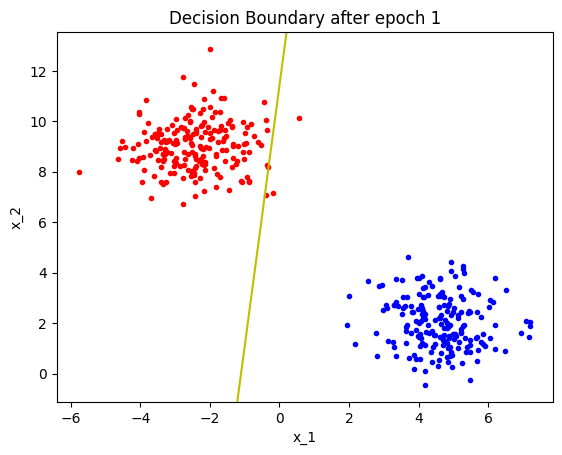

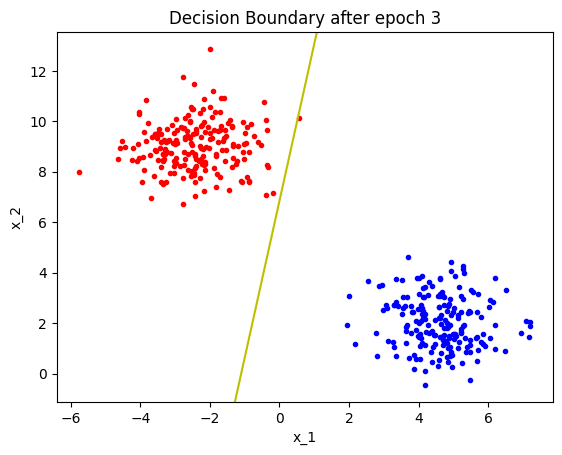

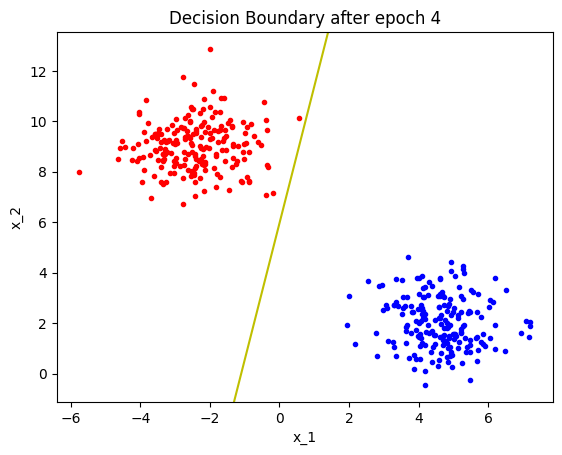

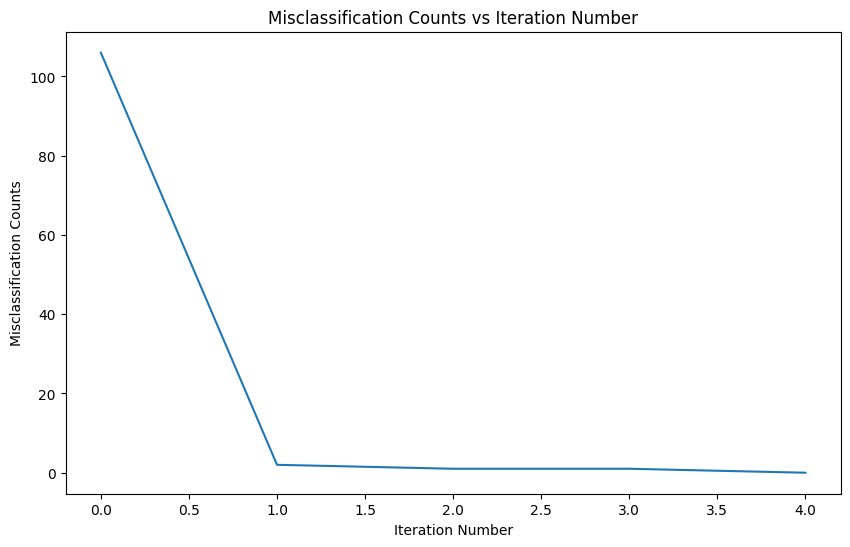

In [ ]:
# Set learning rate and maximum number of epochs
lr = 0.001
max_epochs = 200

# Run perceptron training
miss_list, wh_final = perceptron_train(X_train, y_train, lr, max_epochs)

# Plot misclassification counts versus iteration number
plt.figure(figsize=(10, 6))
plt.plot(range(len(miss_list)), miss_list)
plt.title("Misclassification Counts vs Iteration Number")
plt.xlabel("Iteration Number")
plt.ylabel("Misclassification Counts")
plt.show()


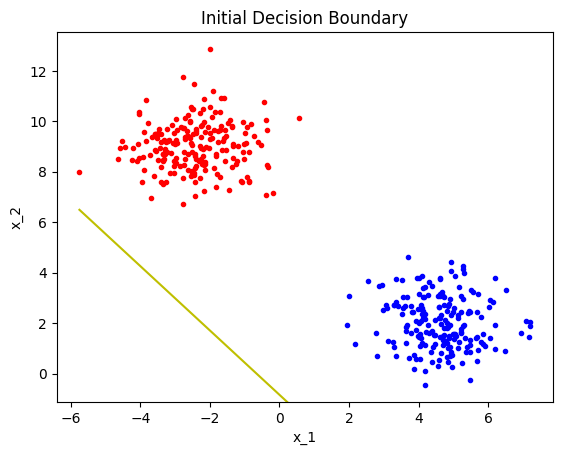

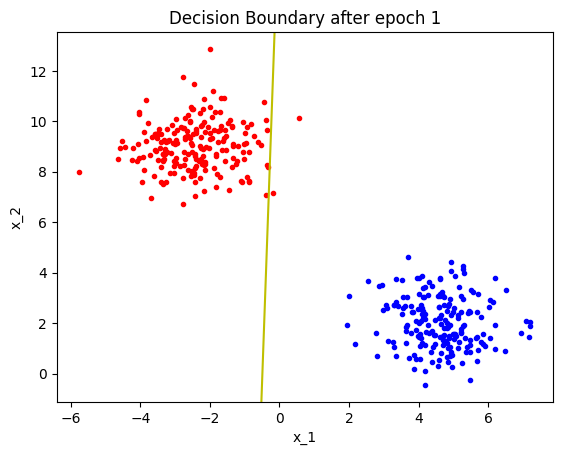

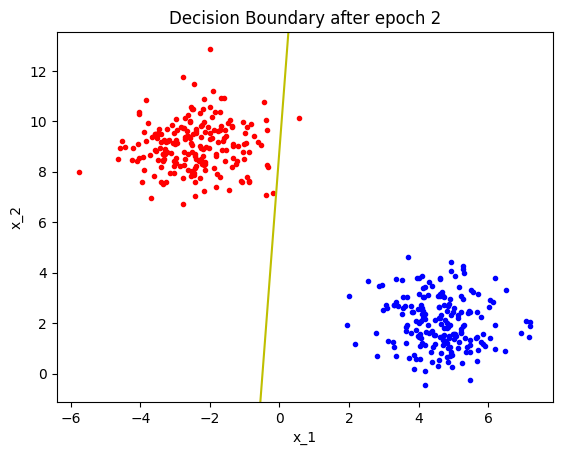

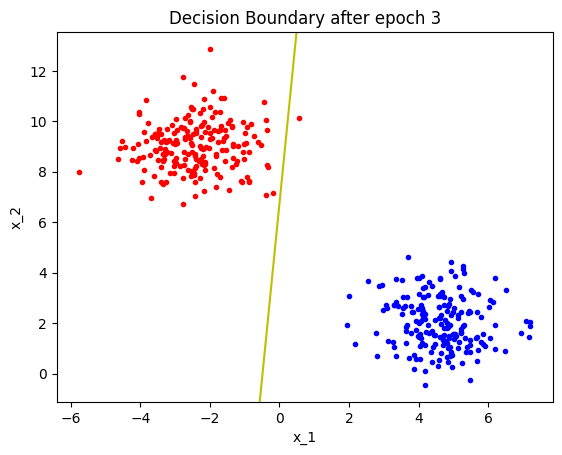

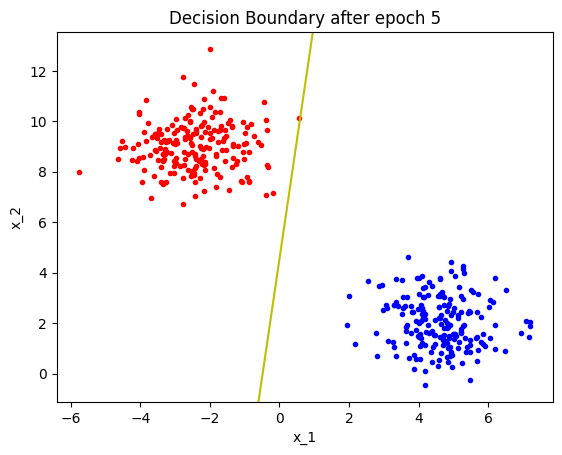

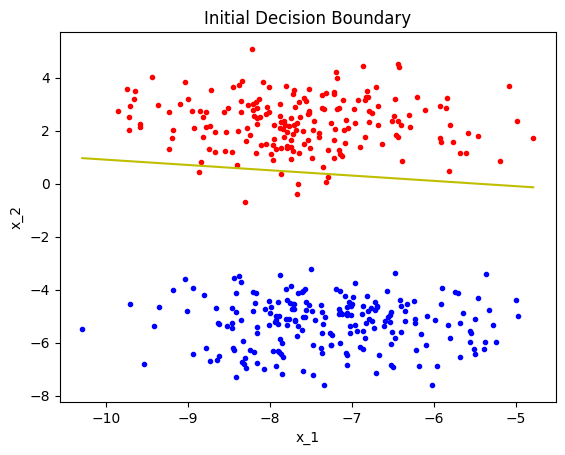

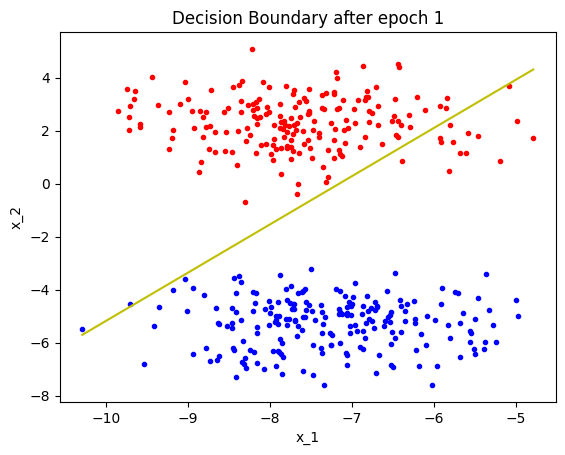

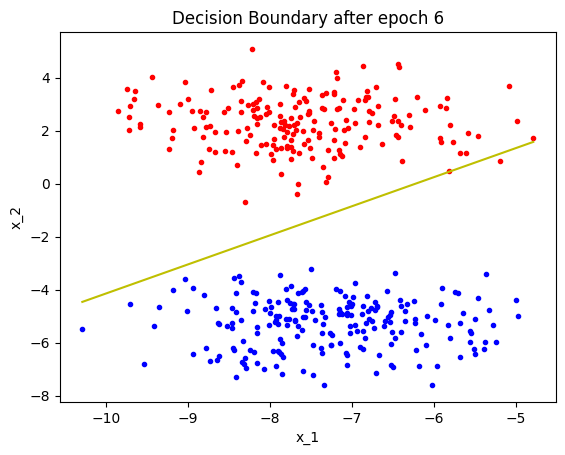

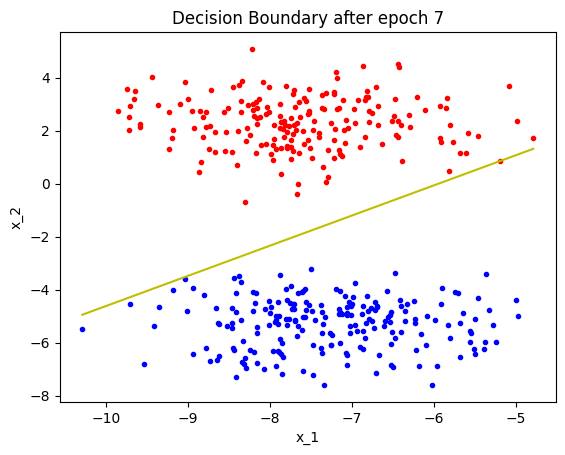

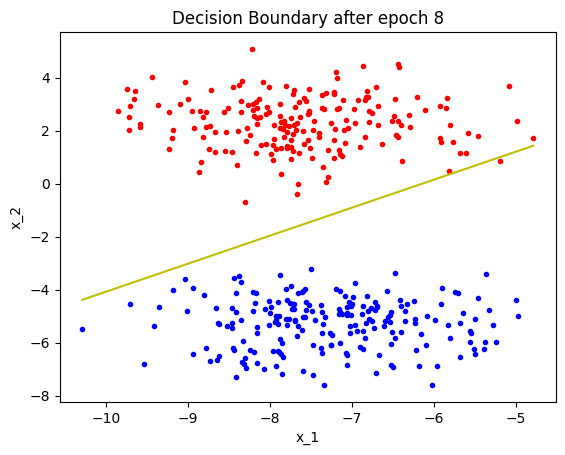

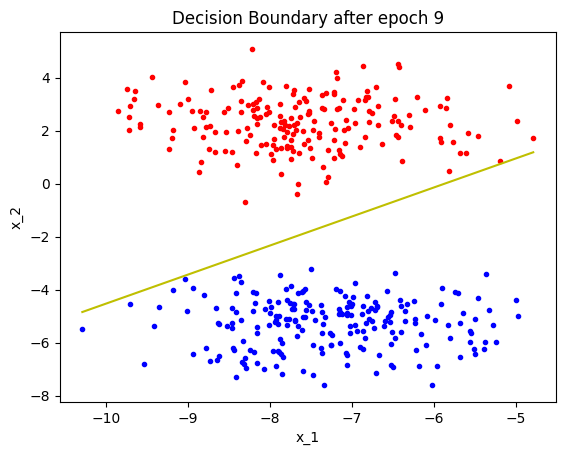

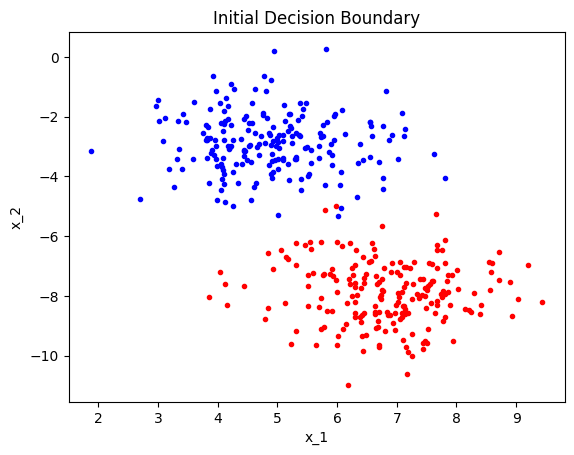

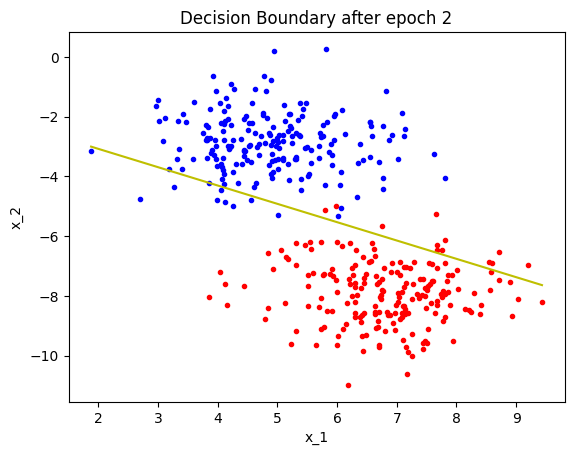

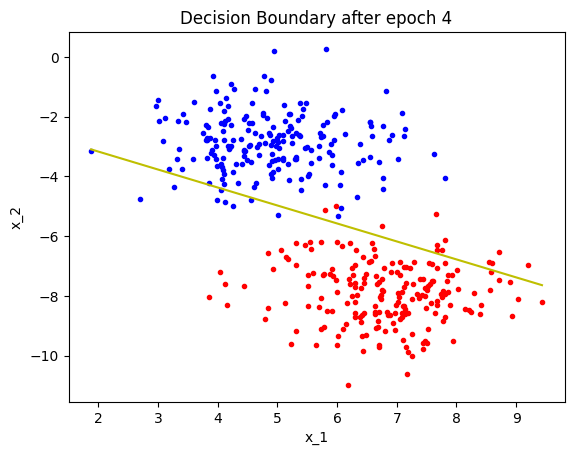

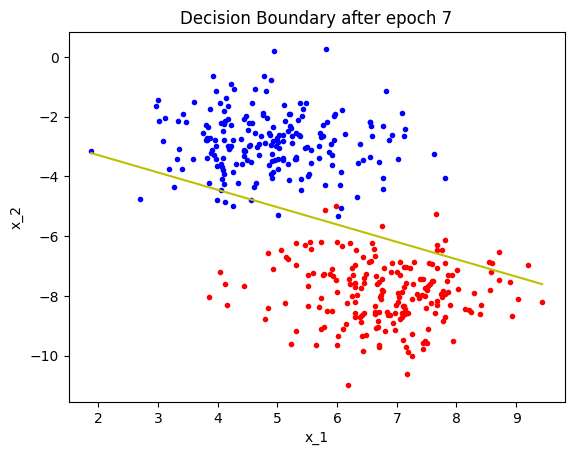

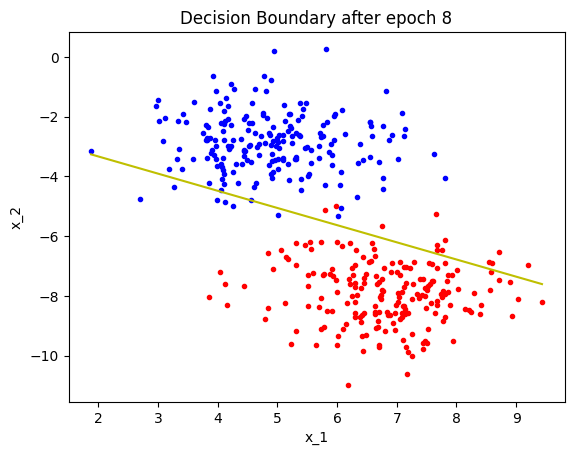

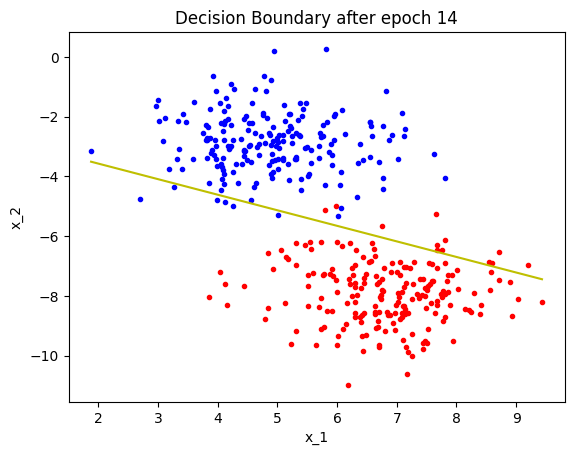

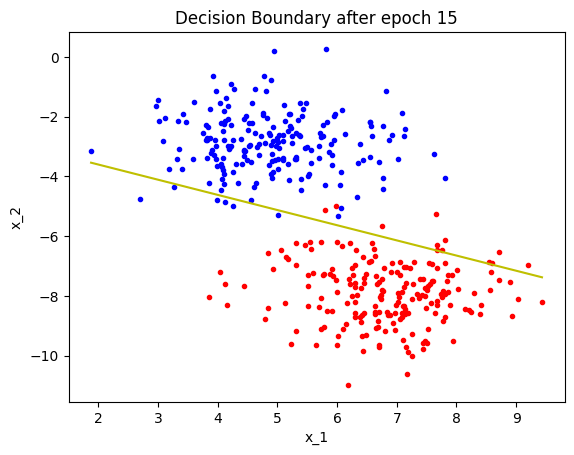

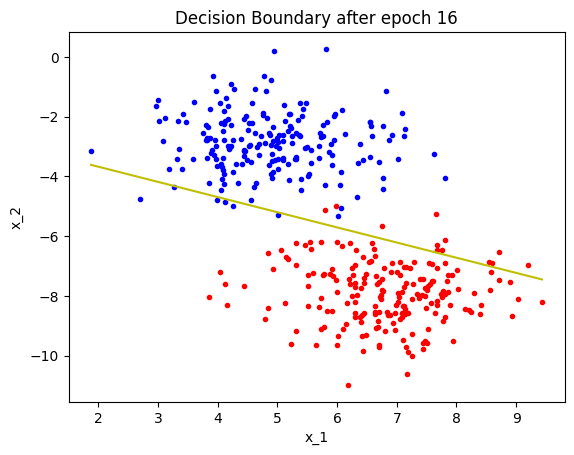

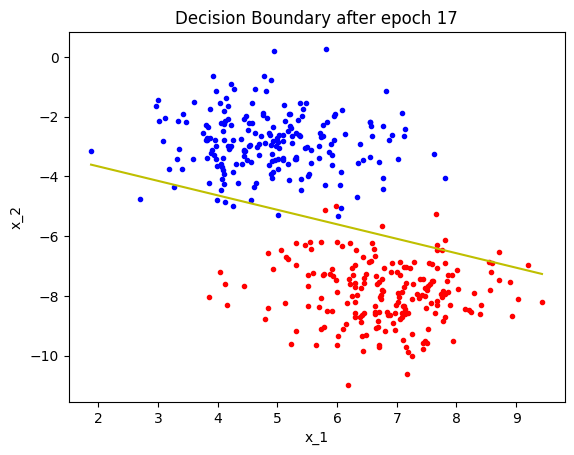

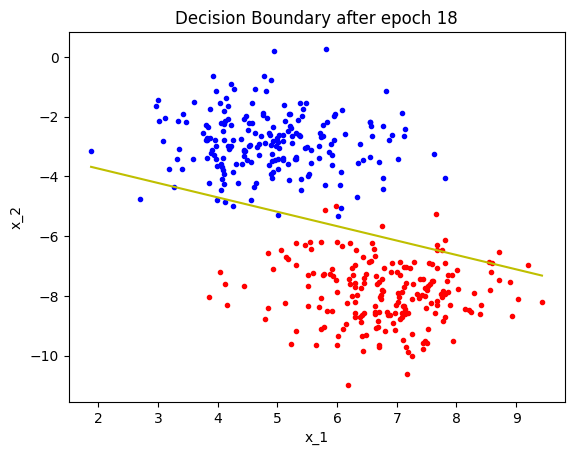

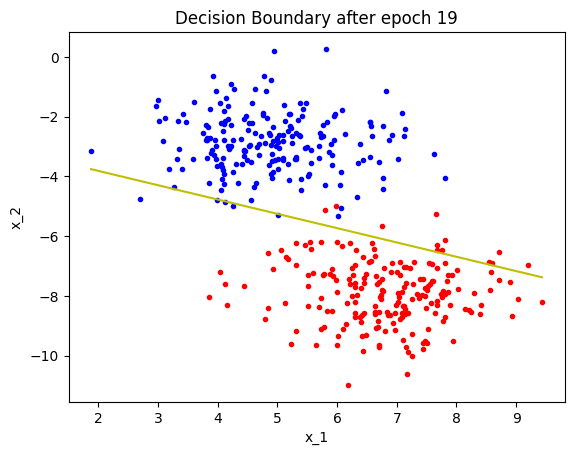

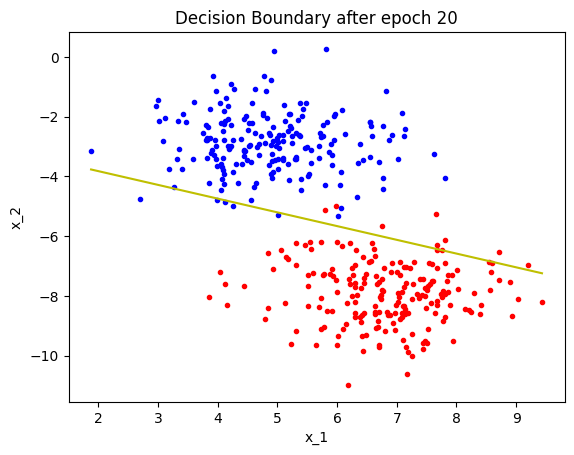

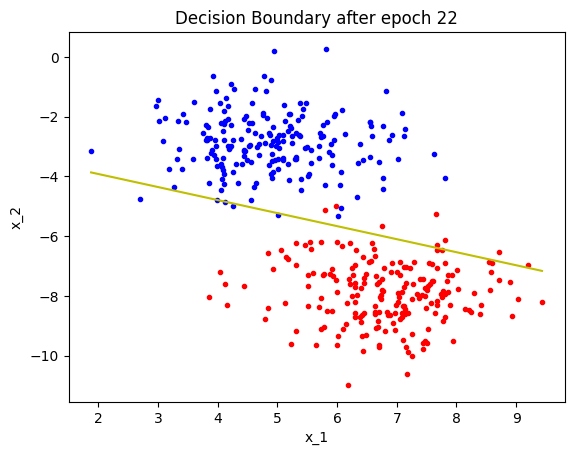

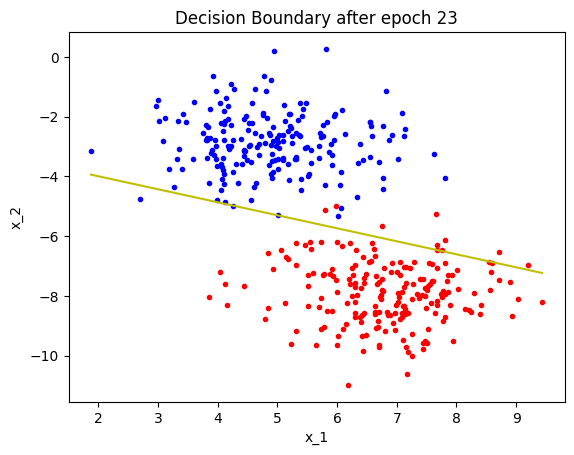

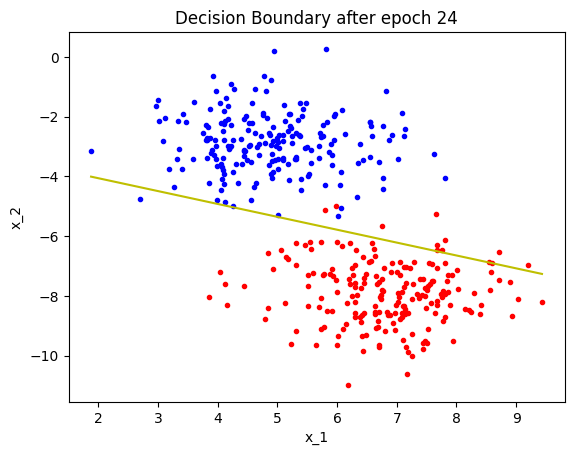

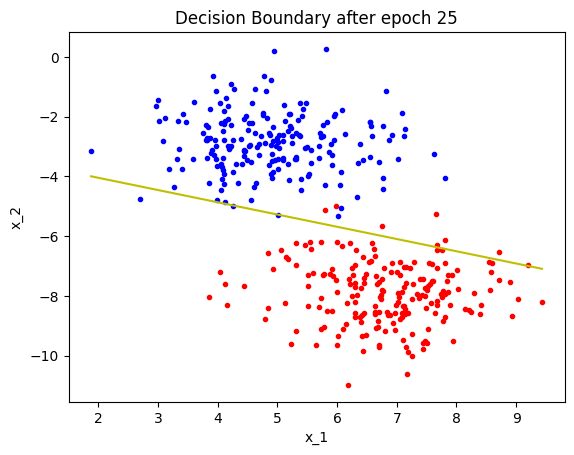

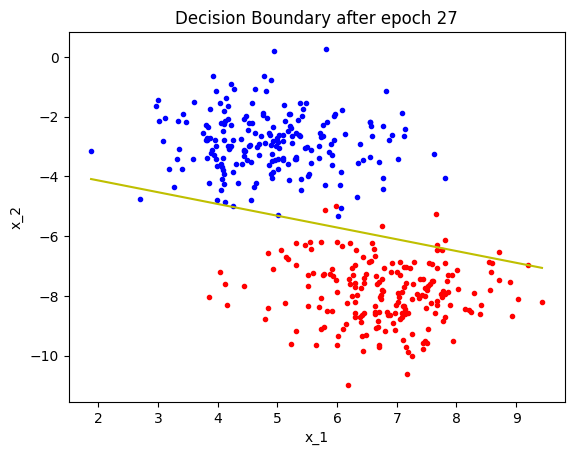

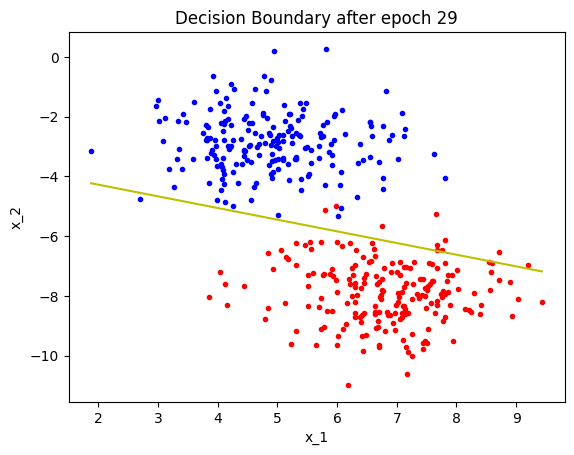

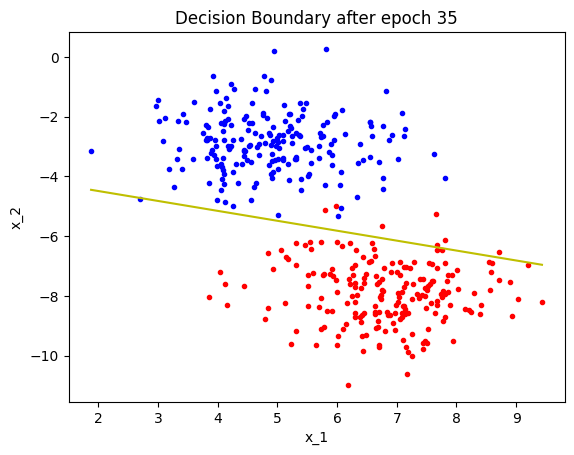

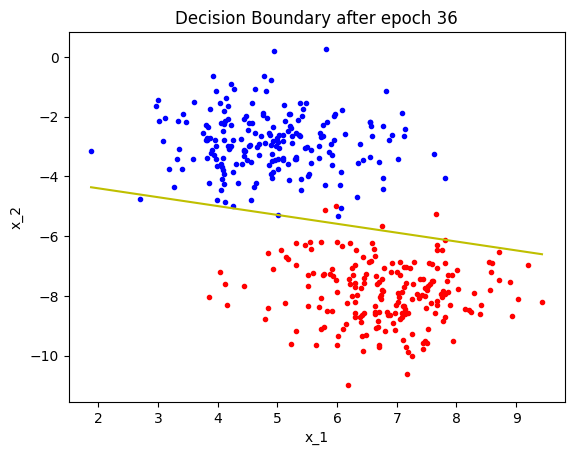

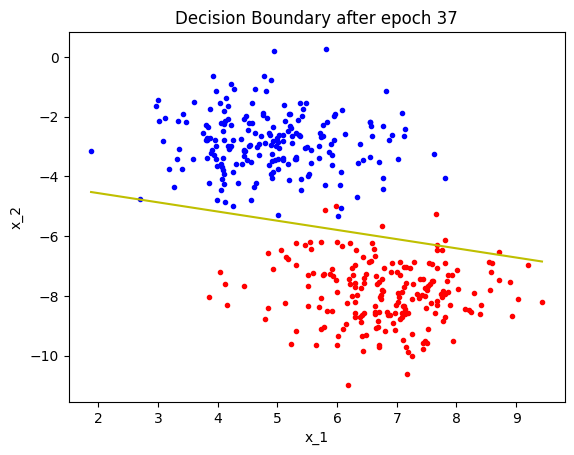

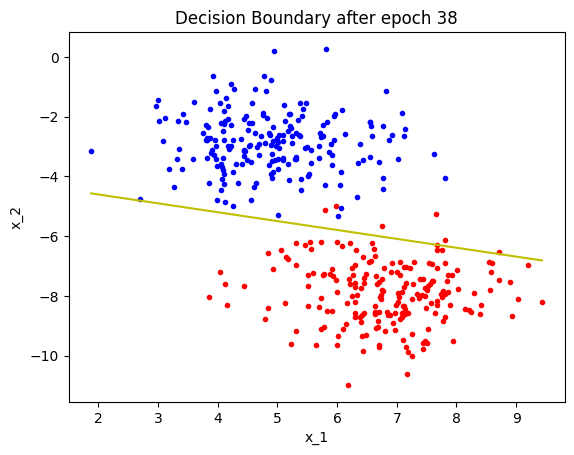

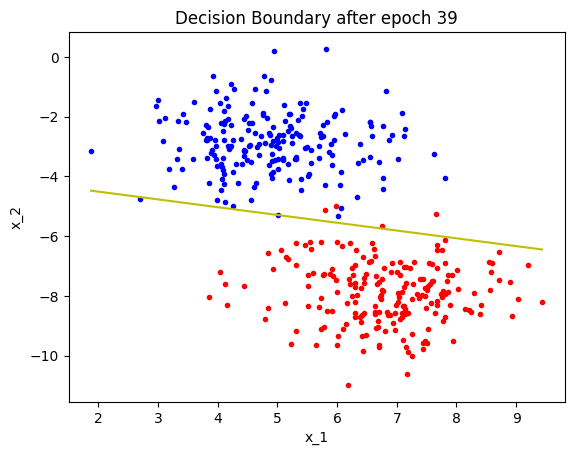

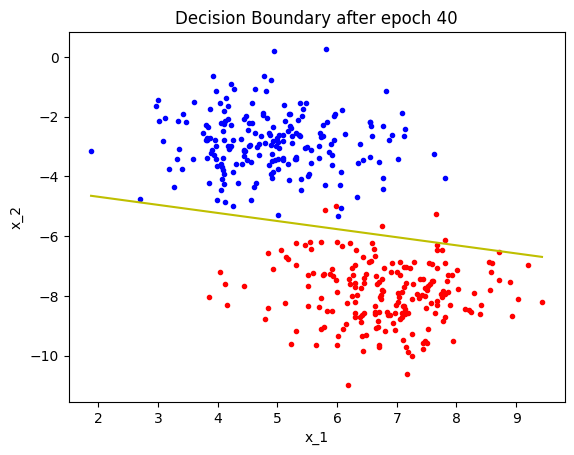

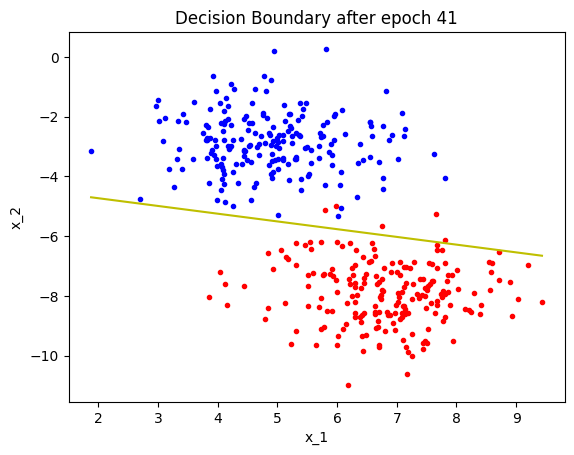

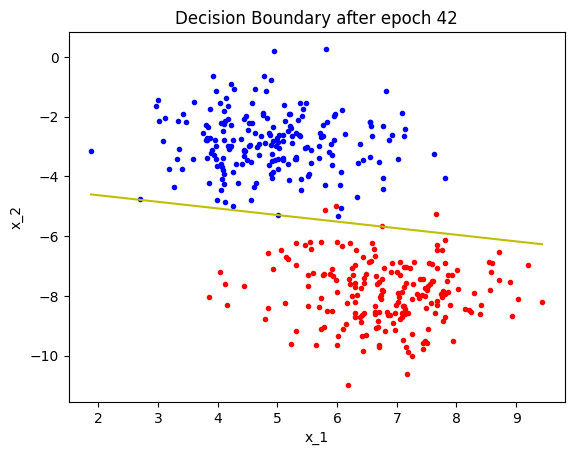

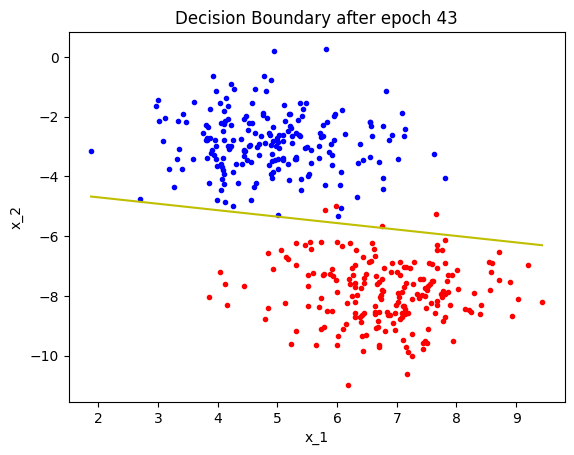

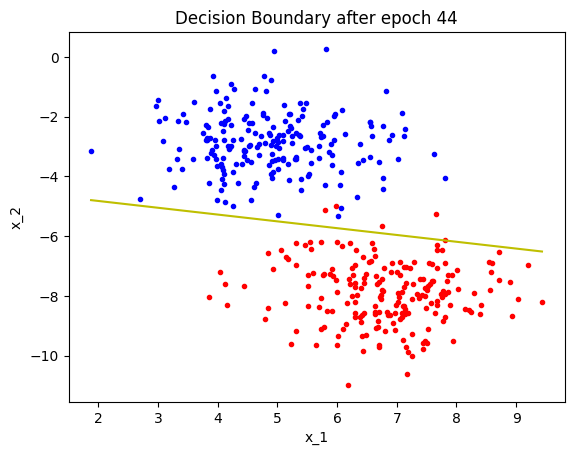

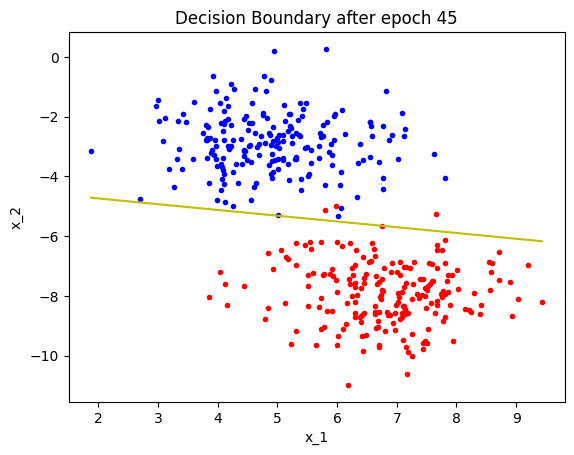

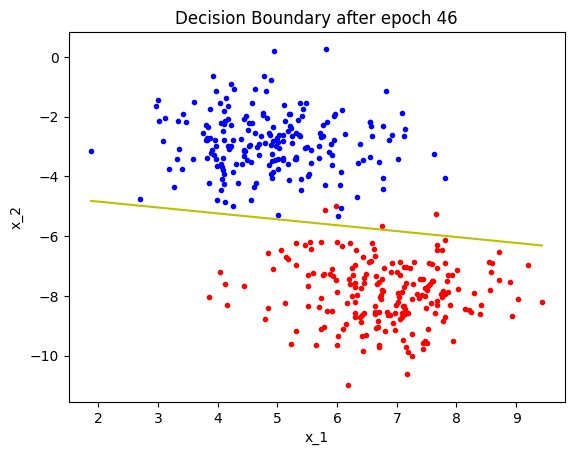

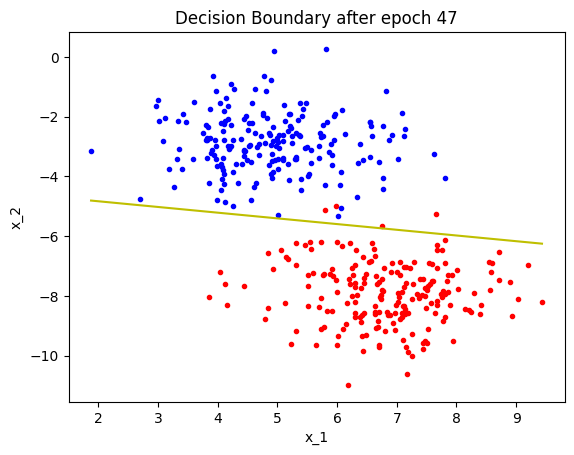

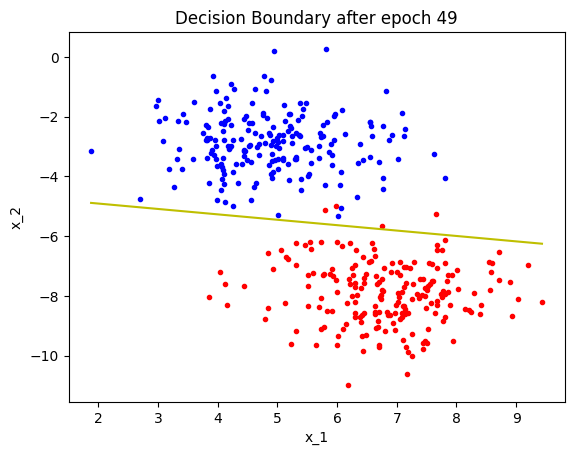

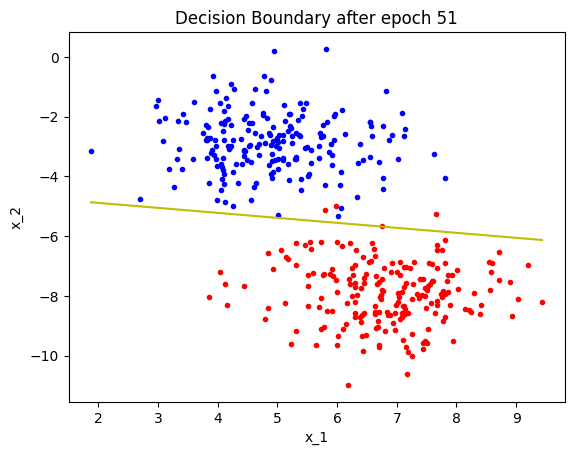

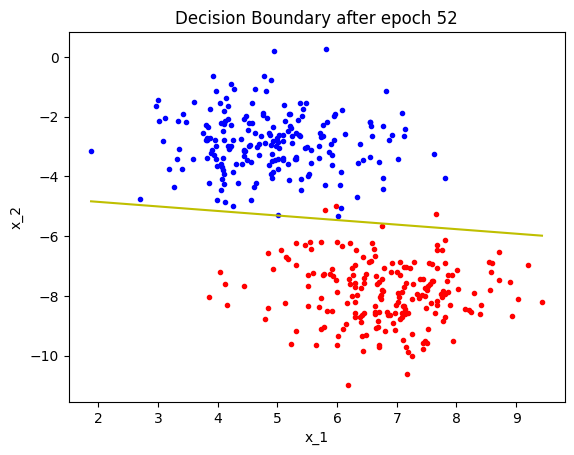

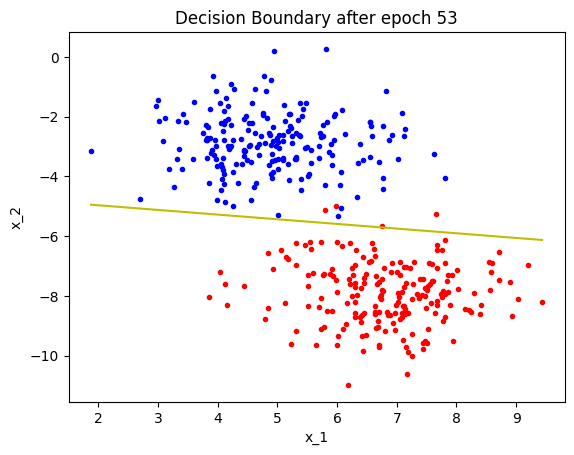

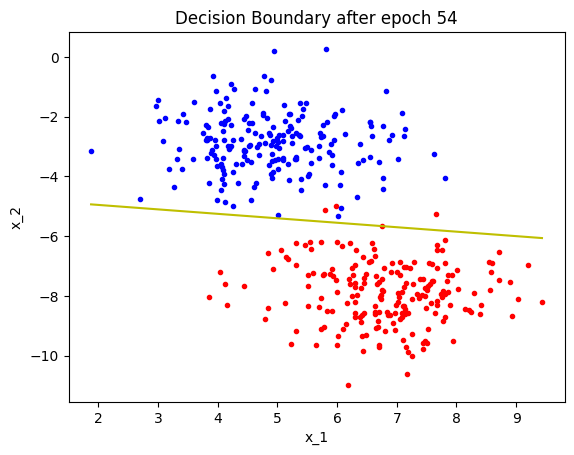

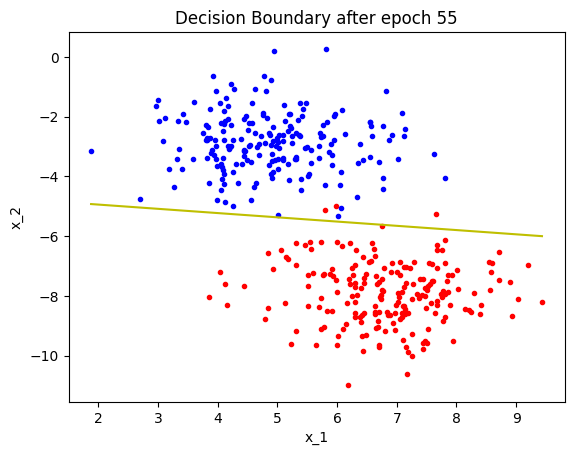

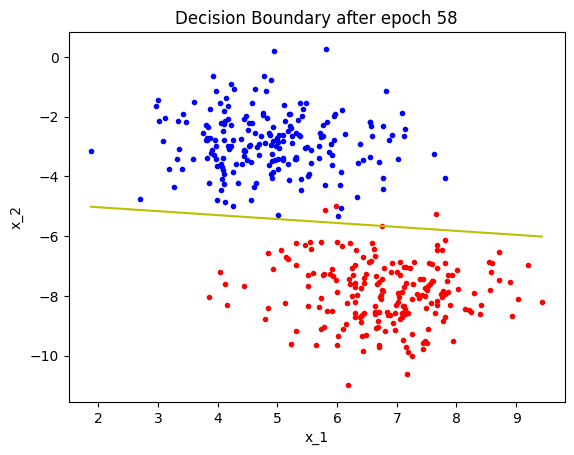

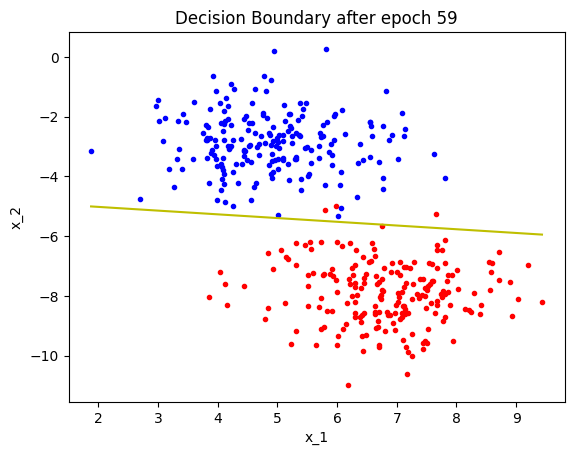

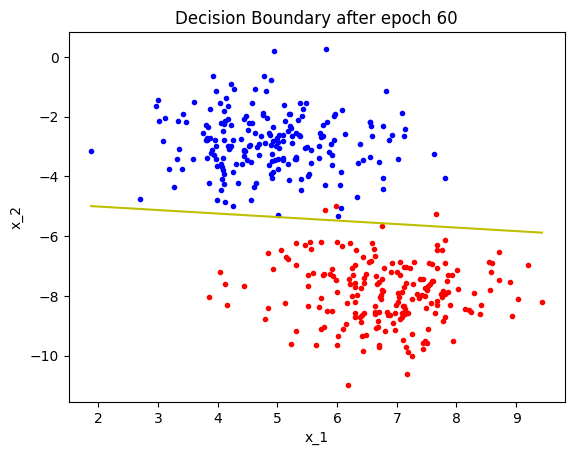

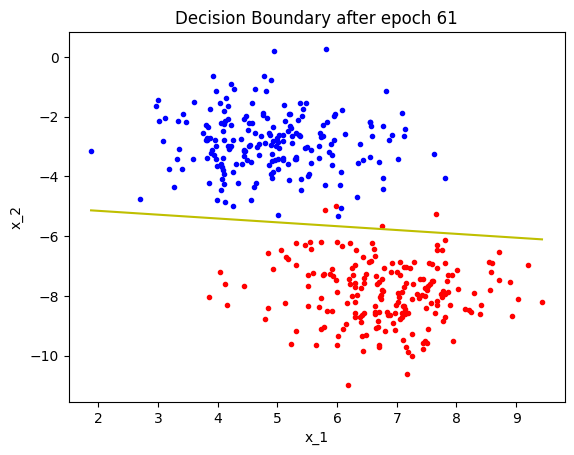

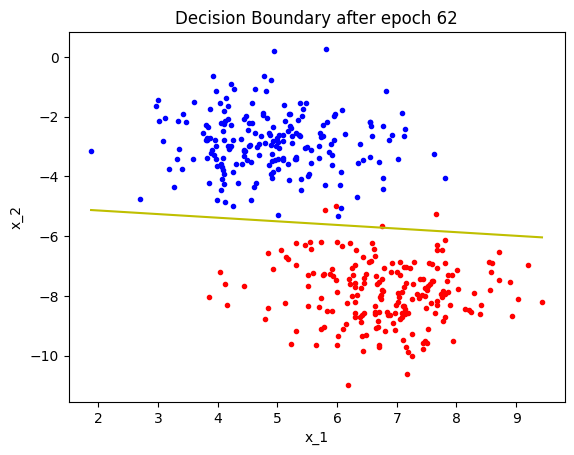

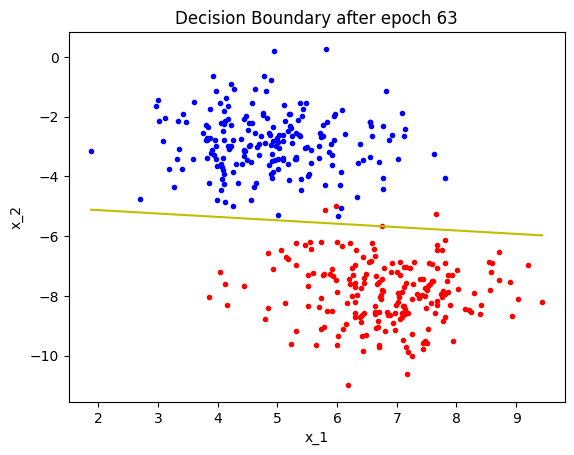

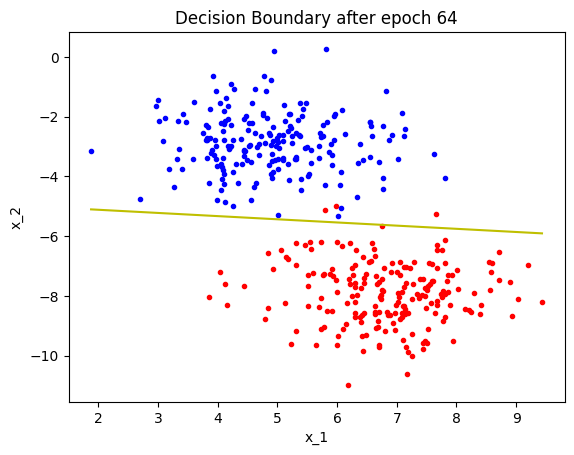

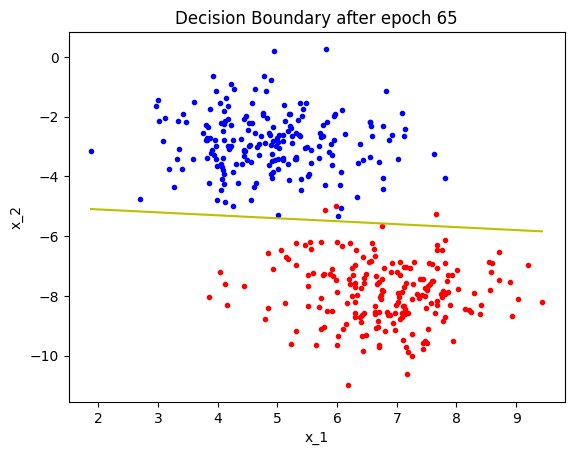

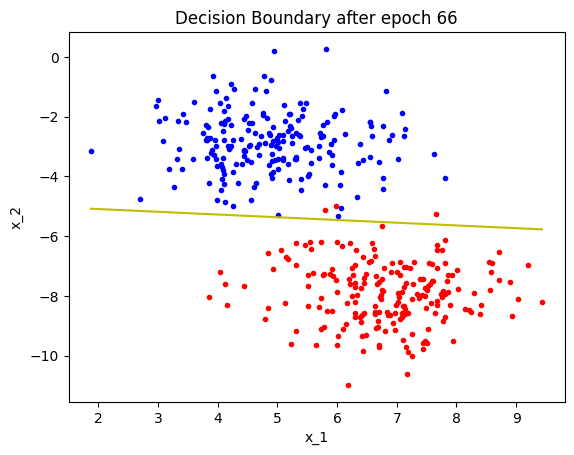

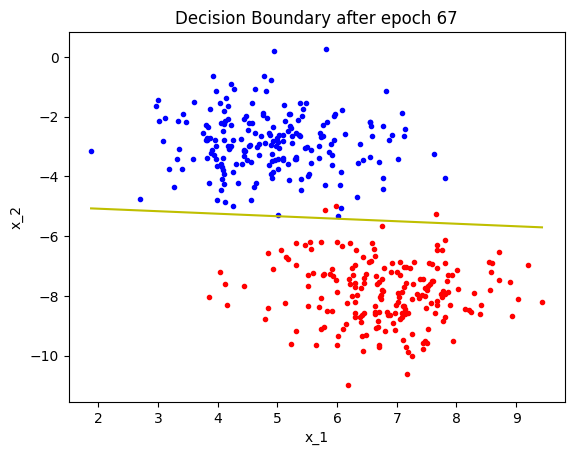

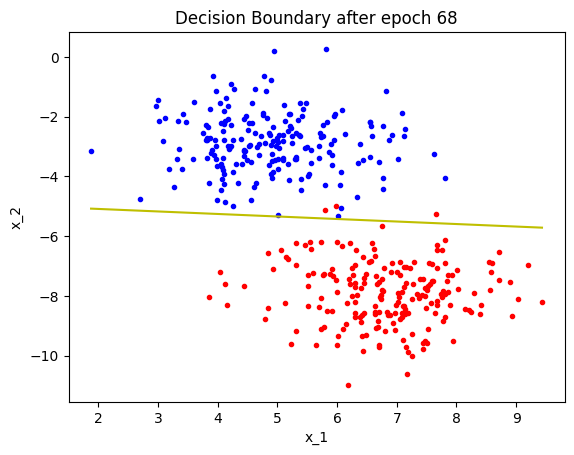

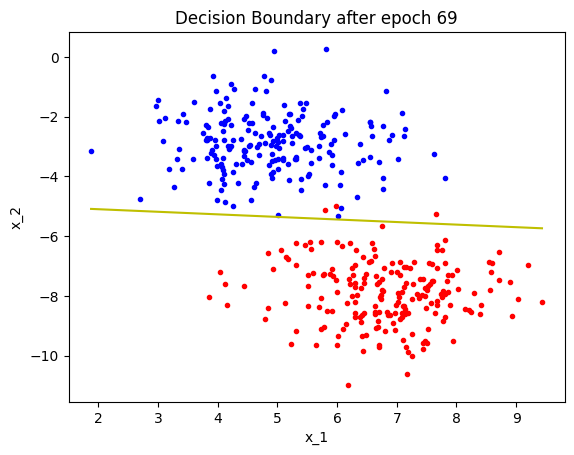

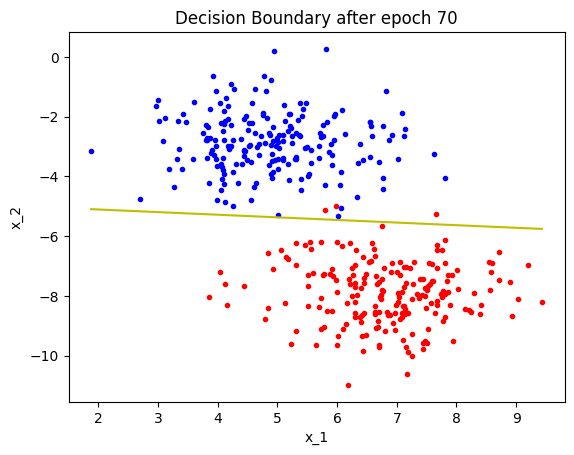

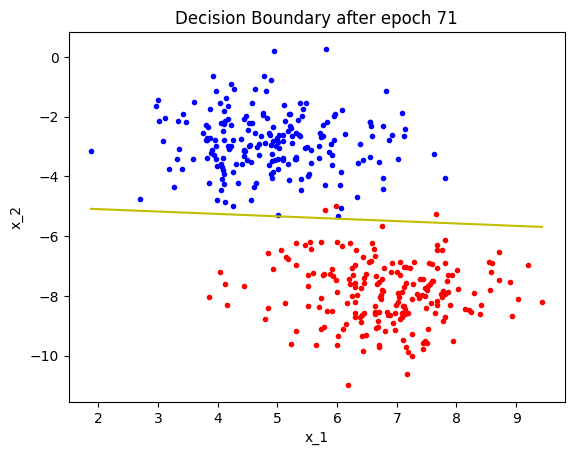

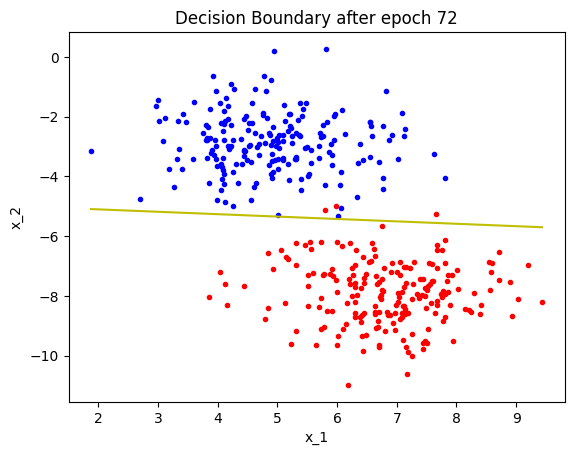

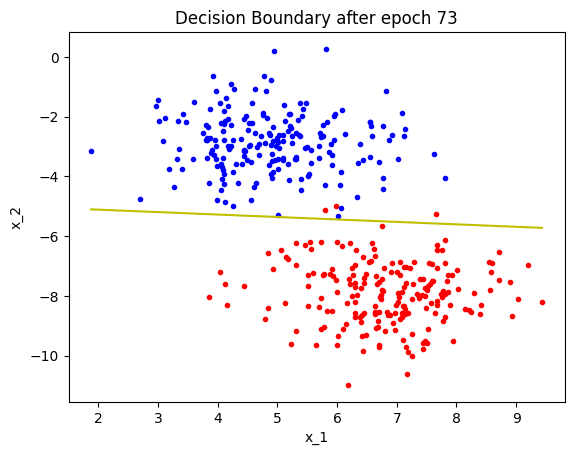

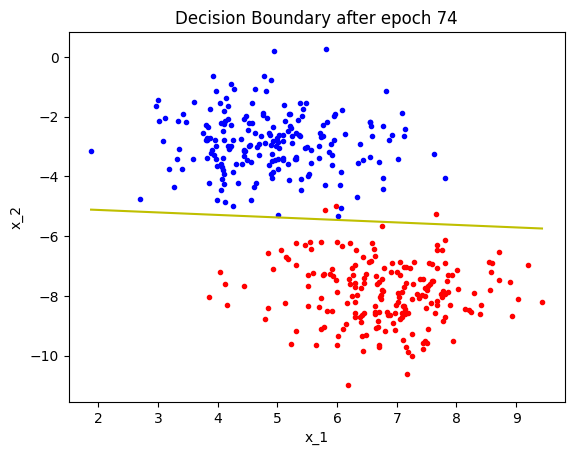

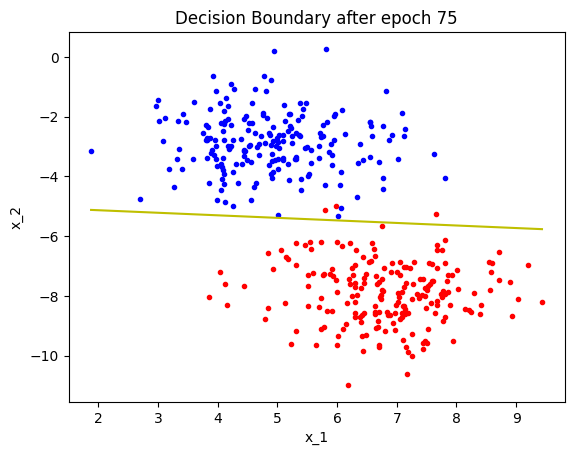

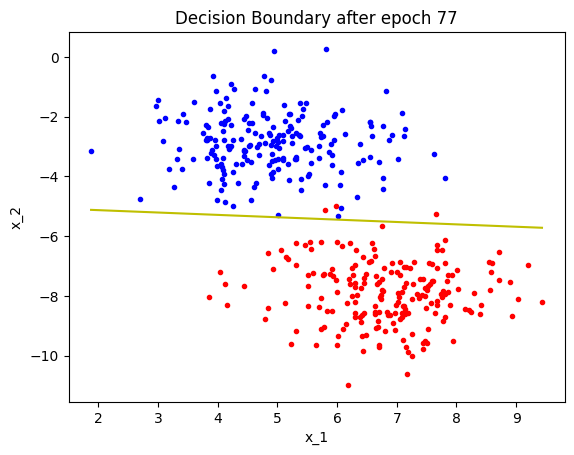

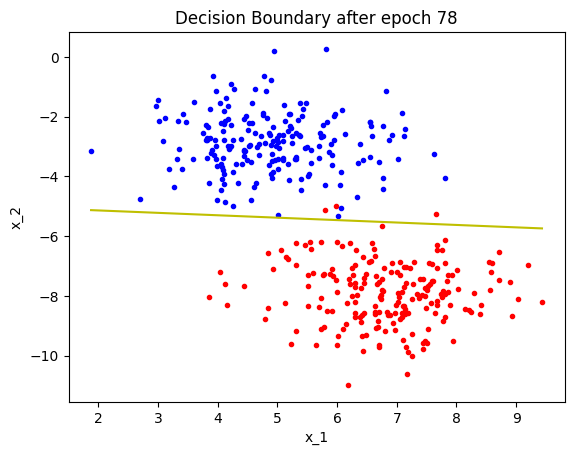

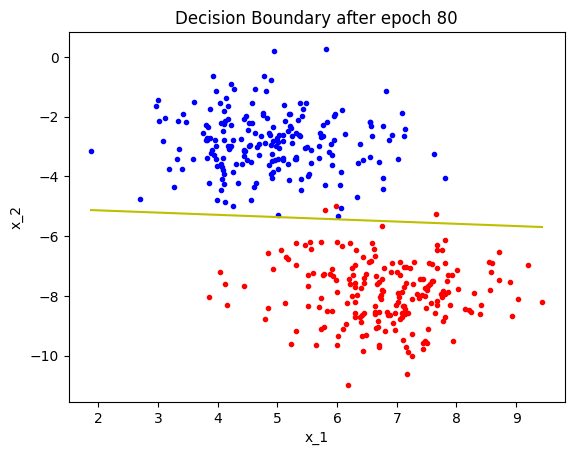

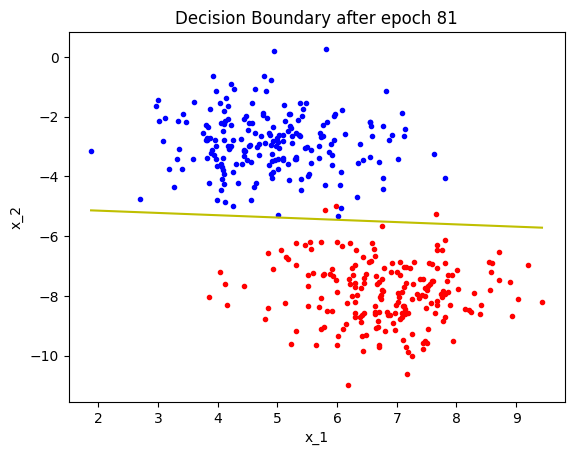

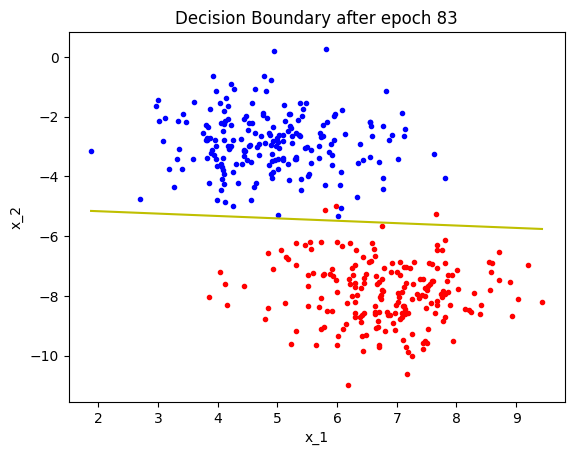

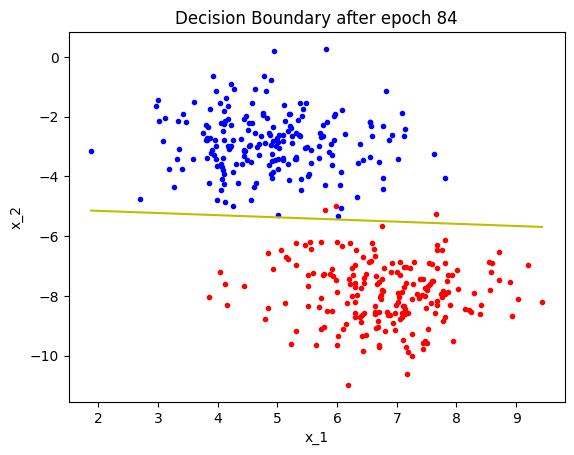

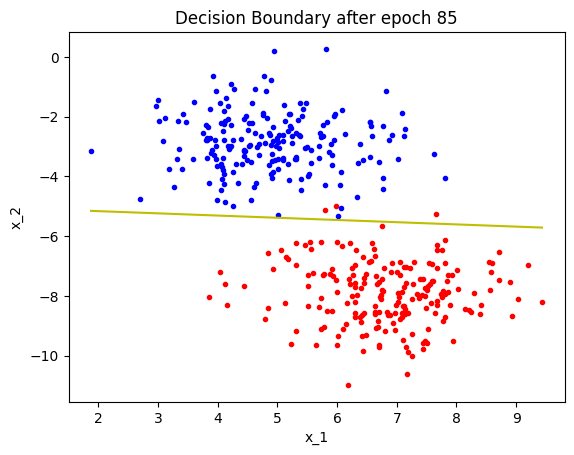

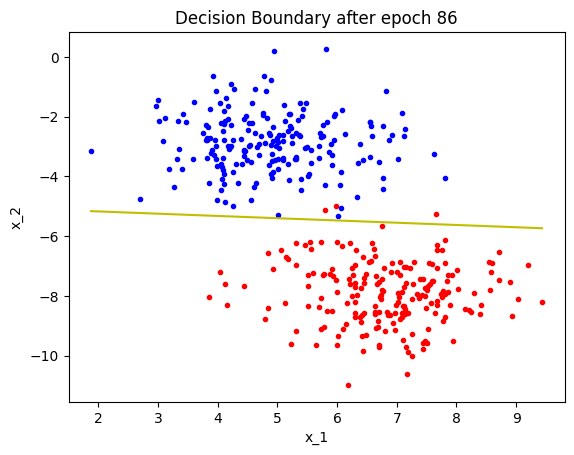

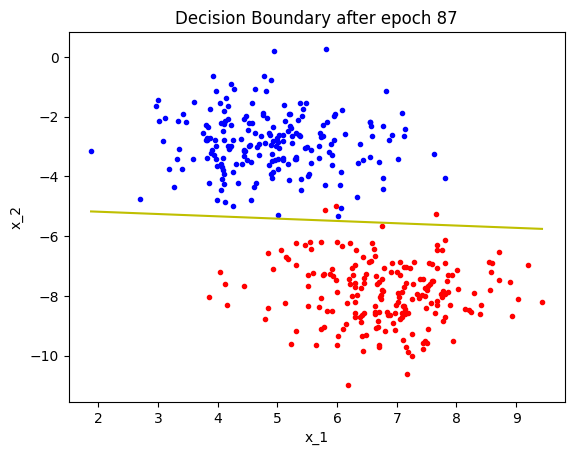

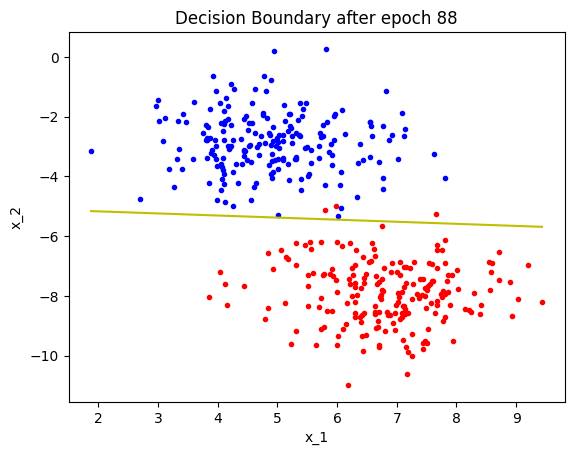

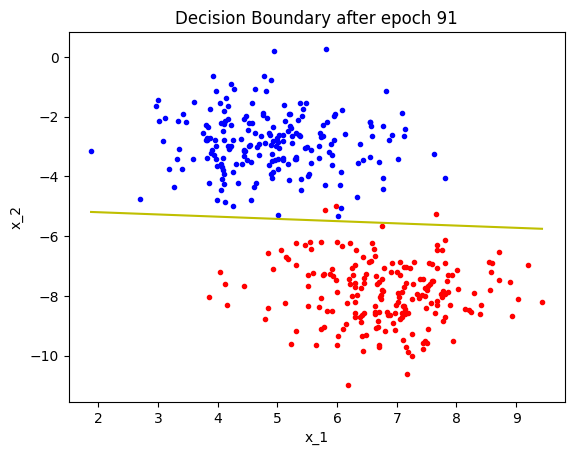

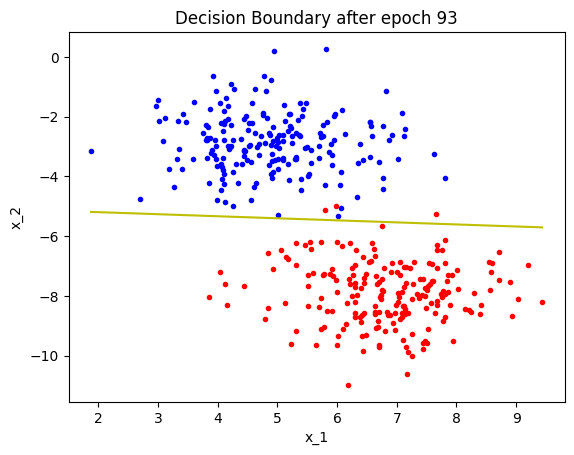

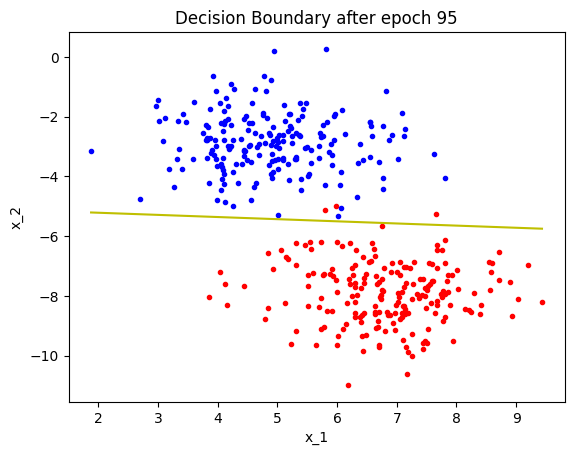

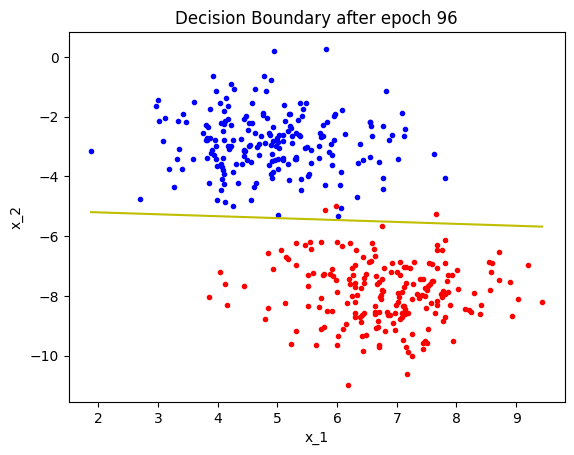

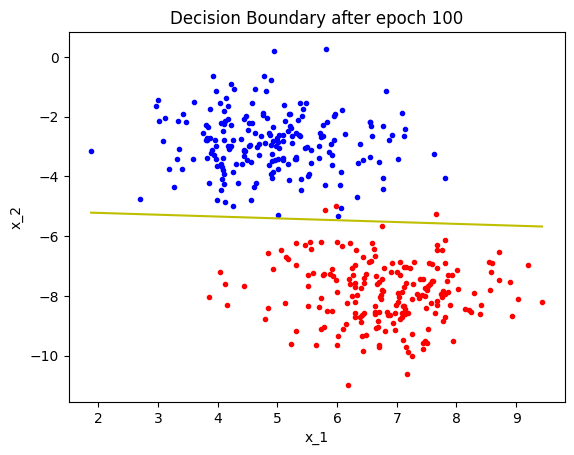

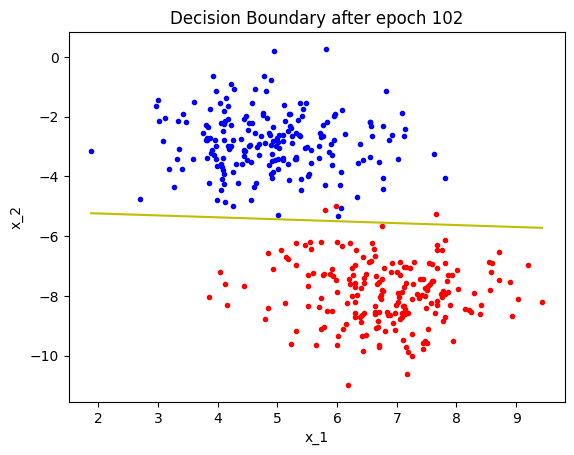

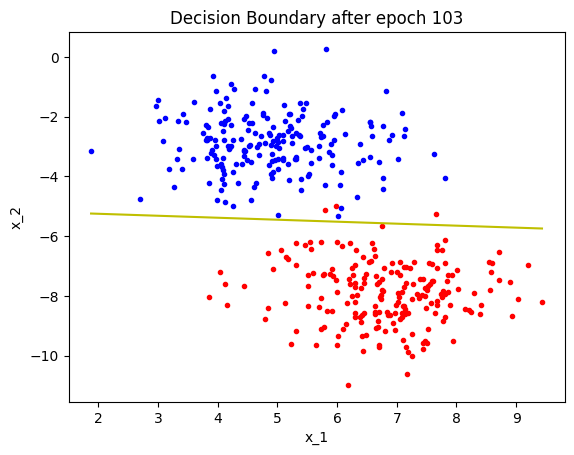

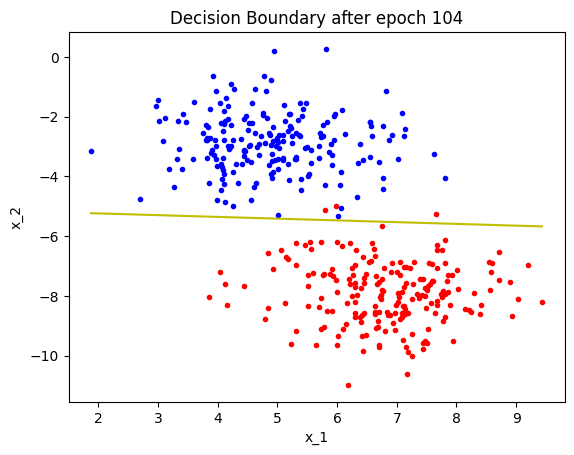

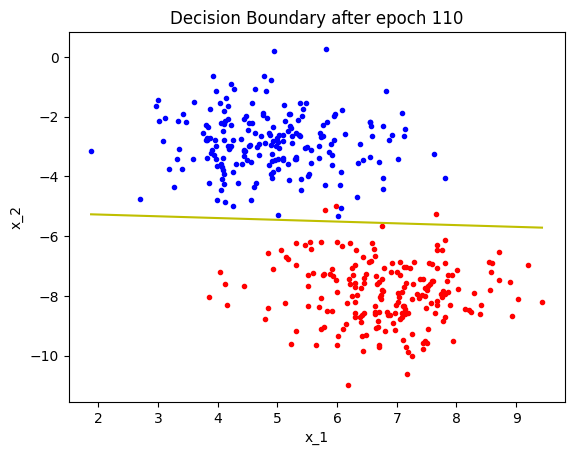

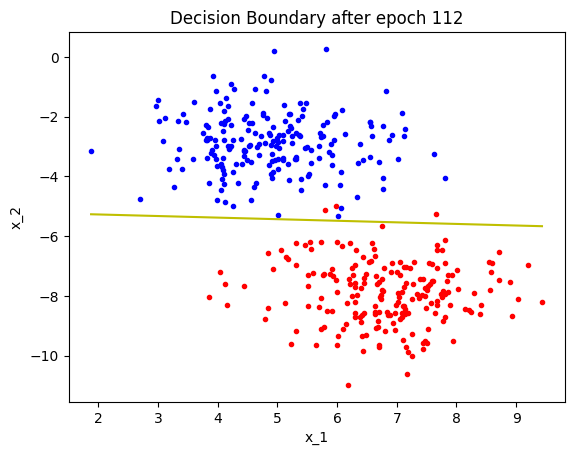

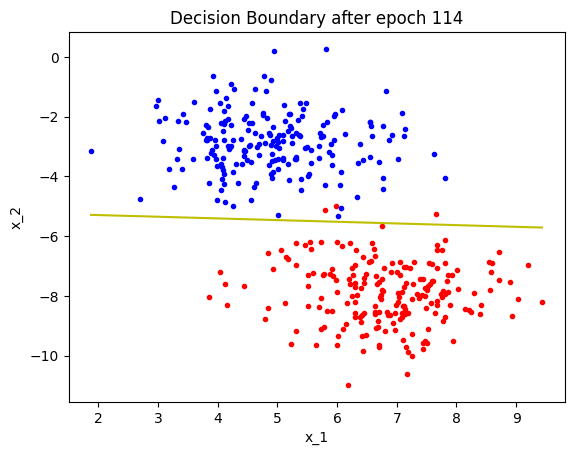

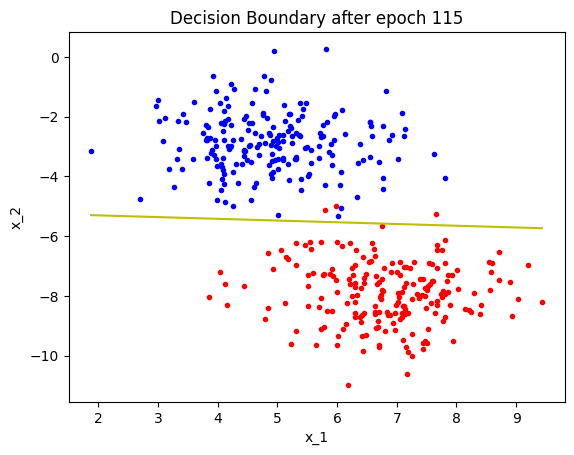

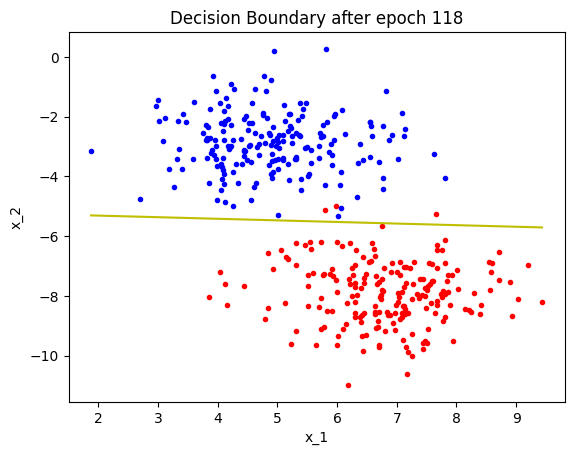

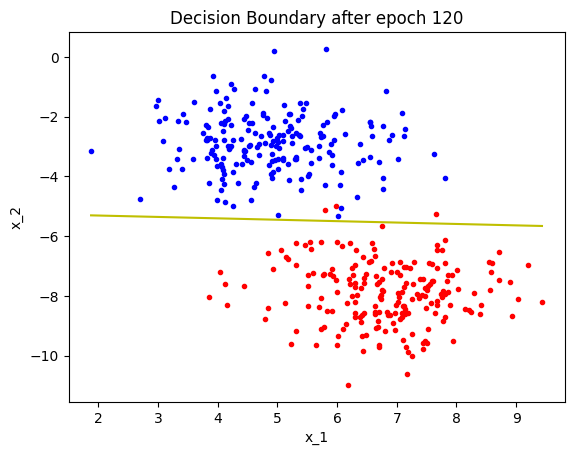

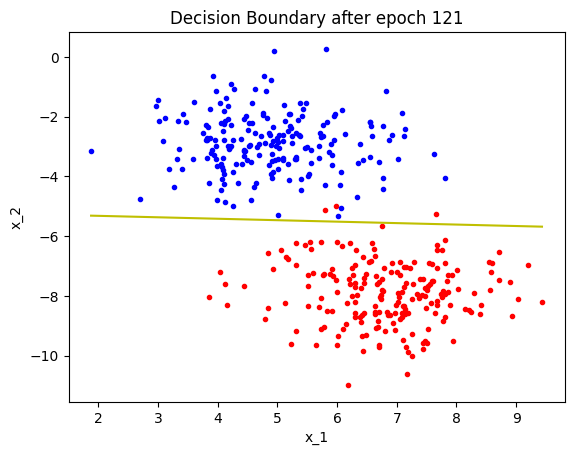

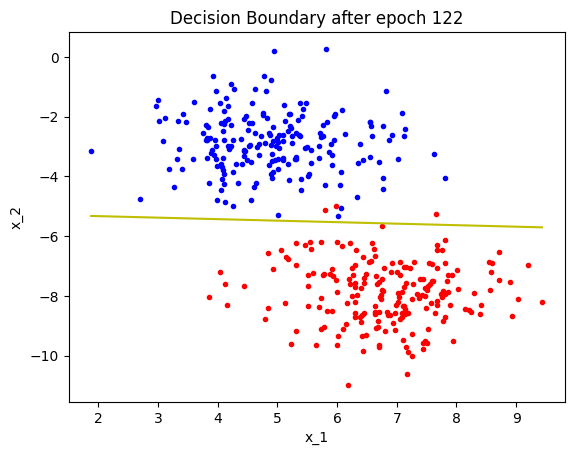

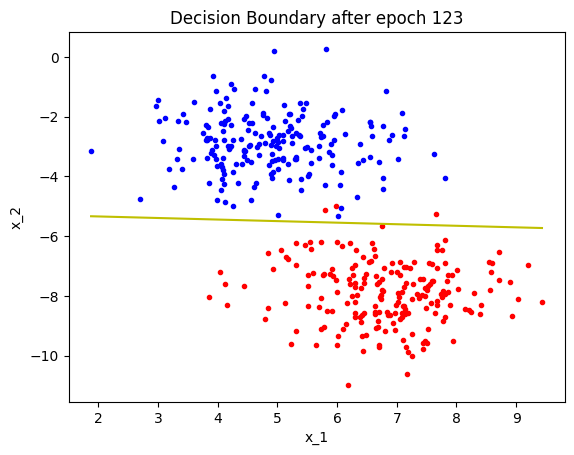

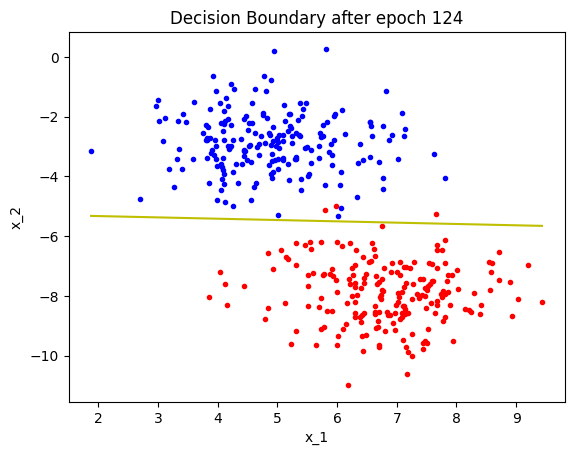

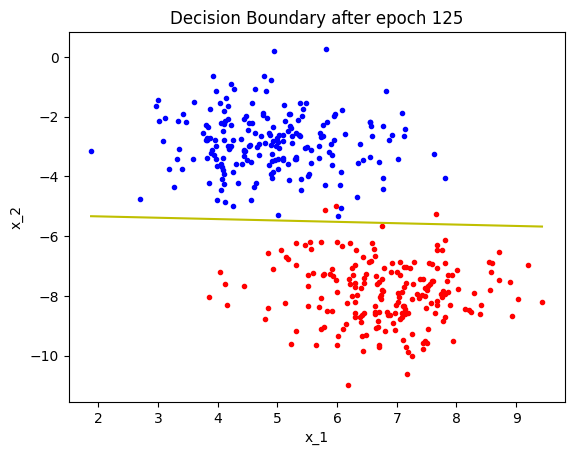

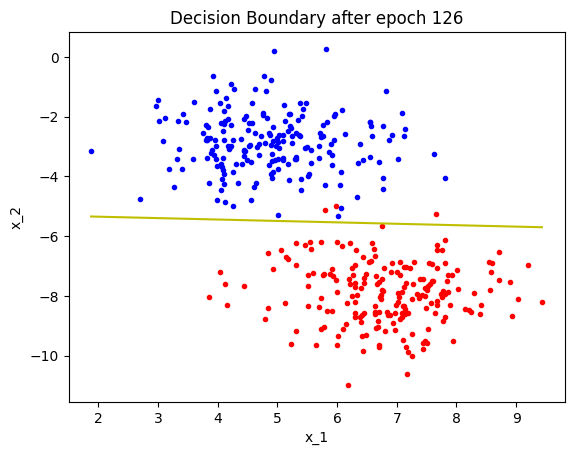

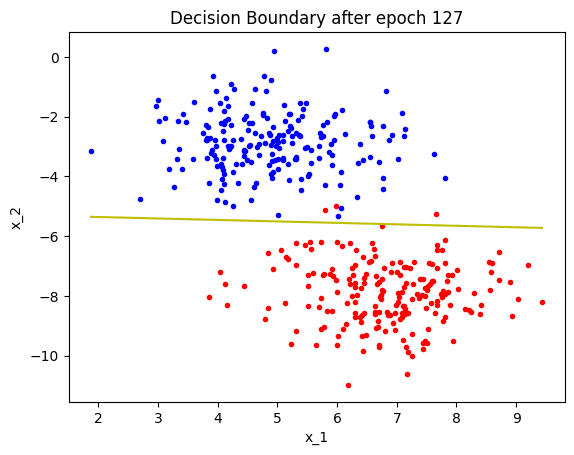

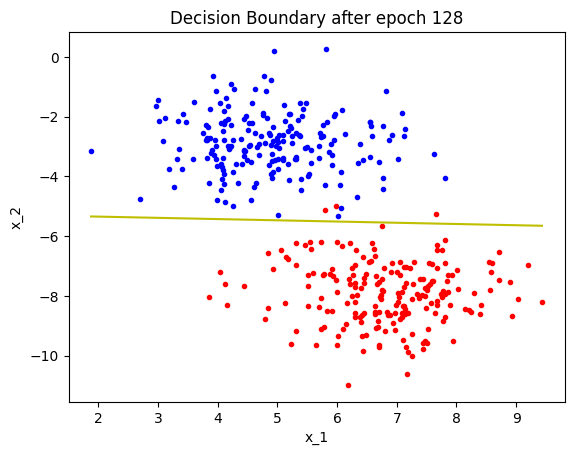

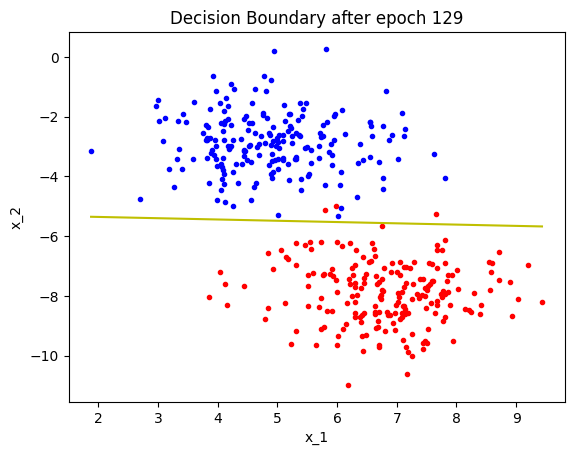

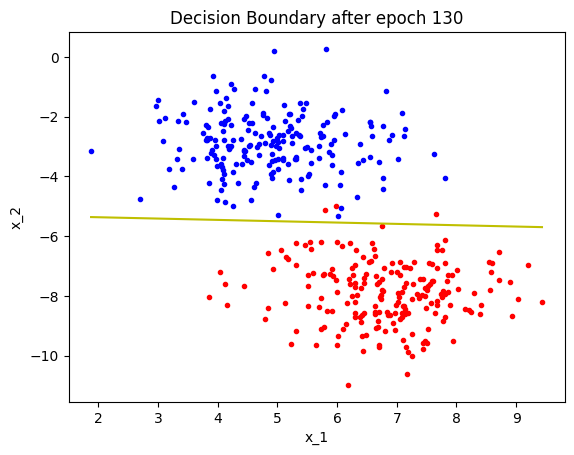

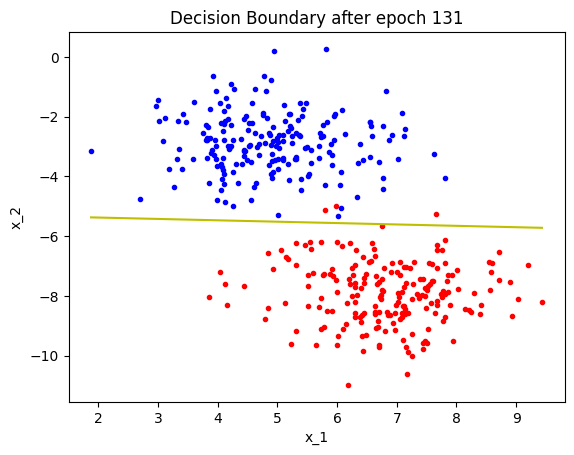

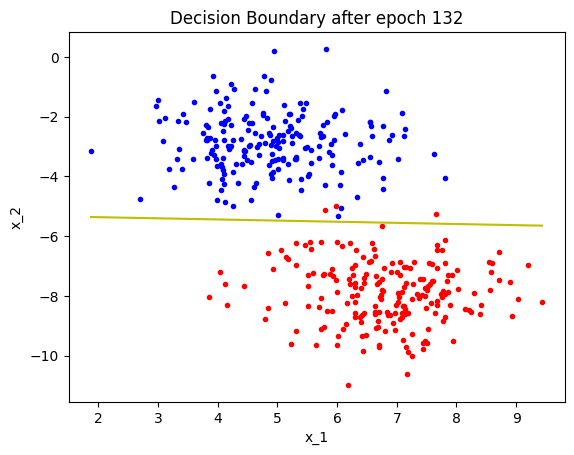

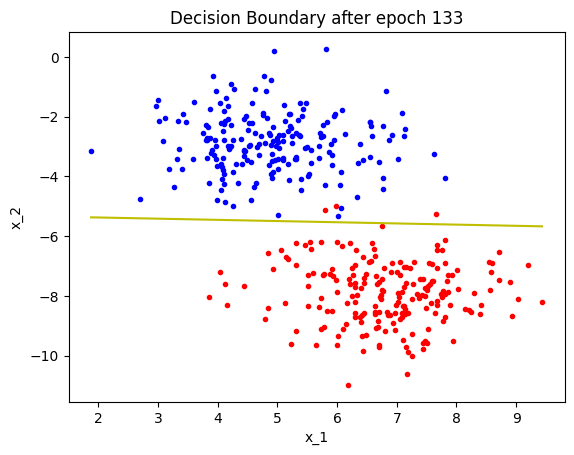

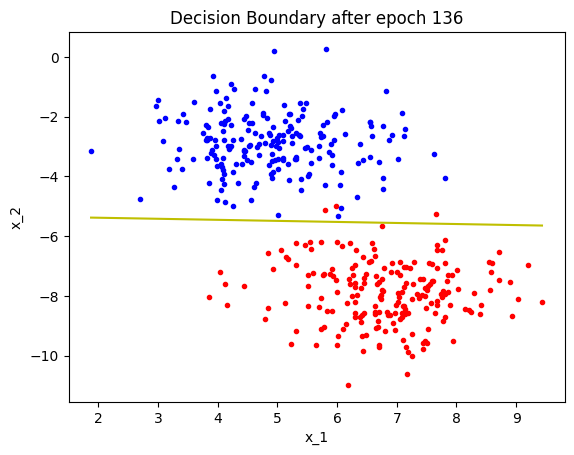

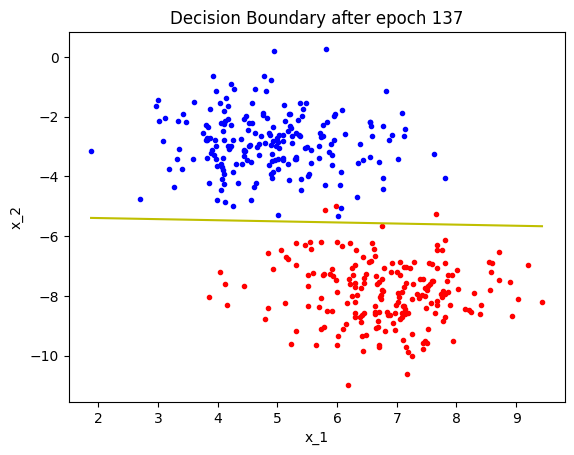

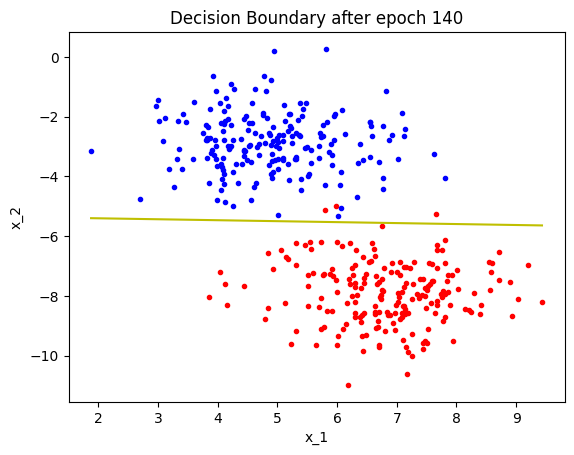

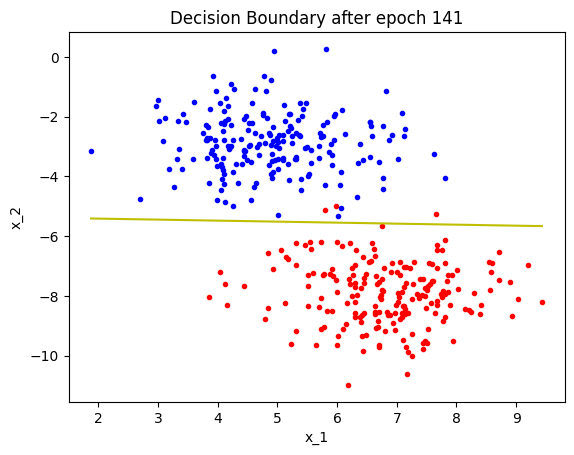

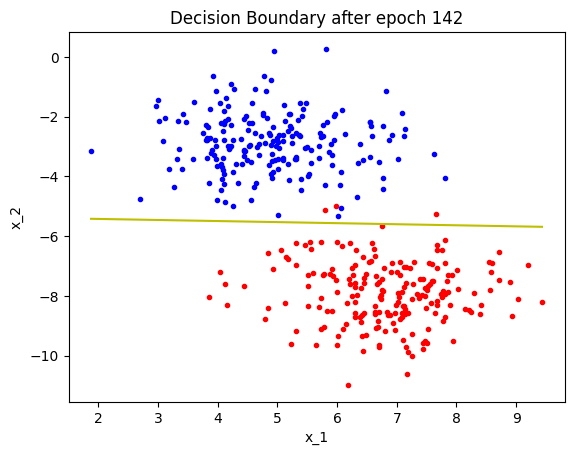

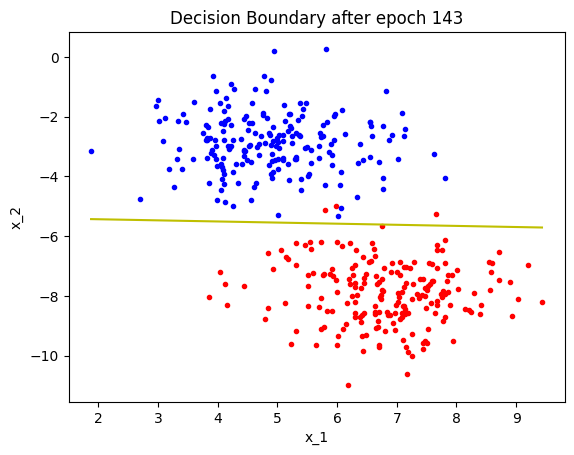

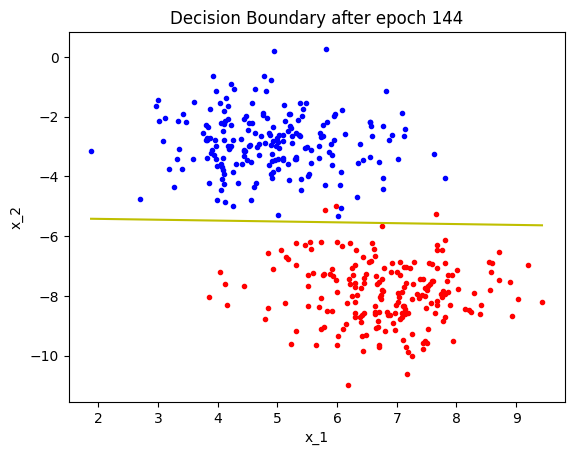

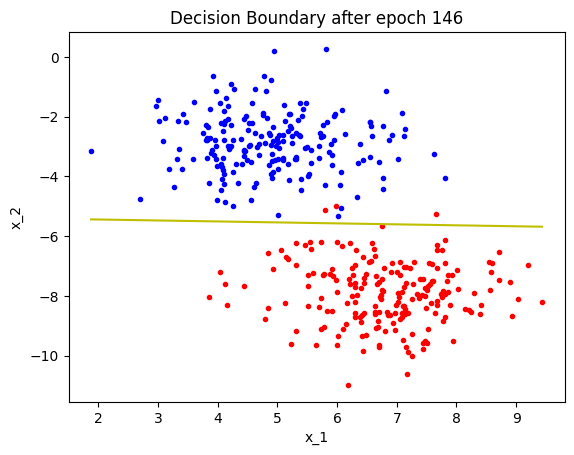

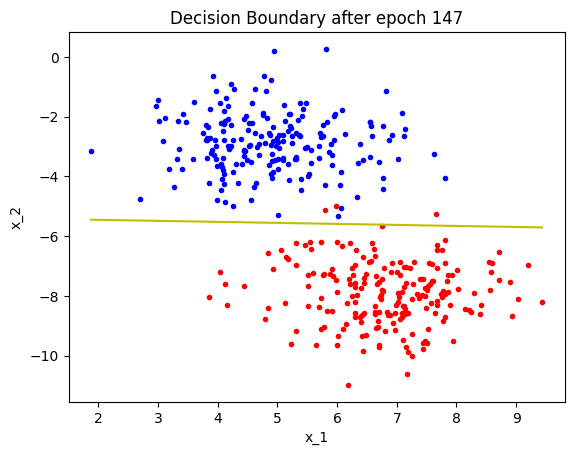

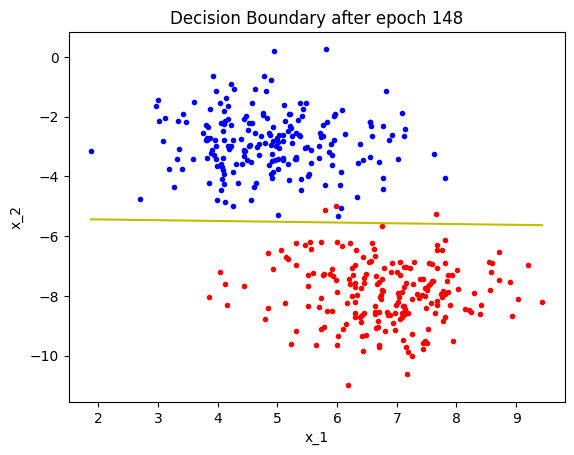

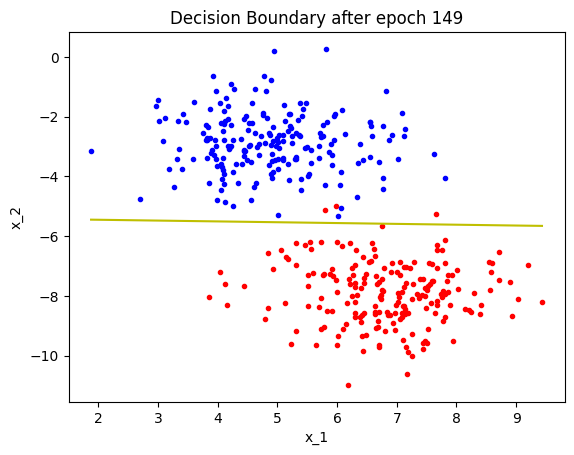

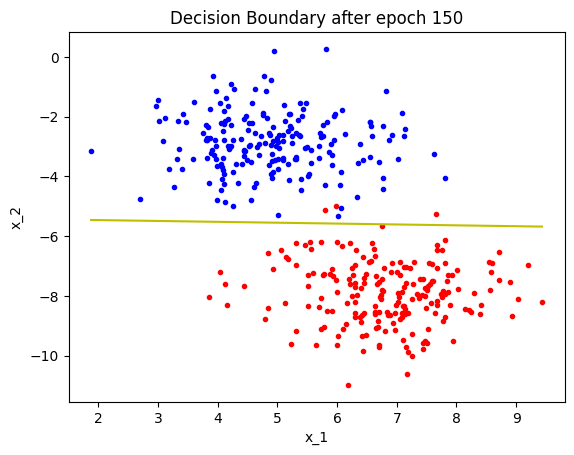

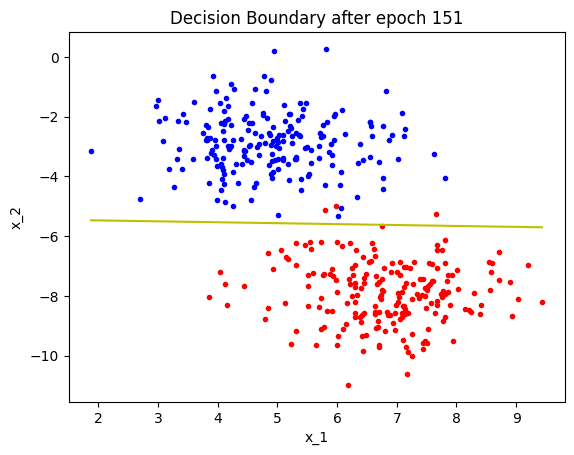

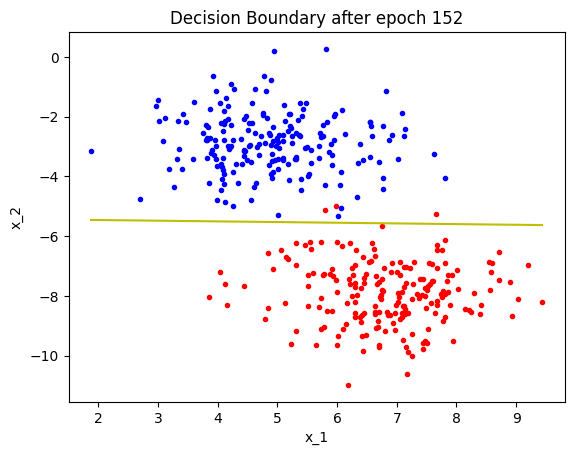

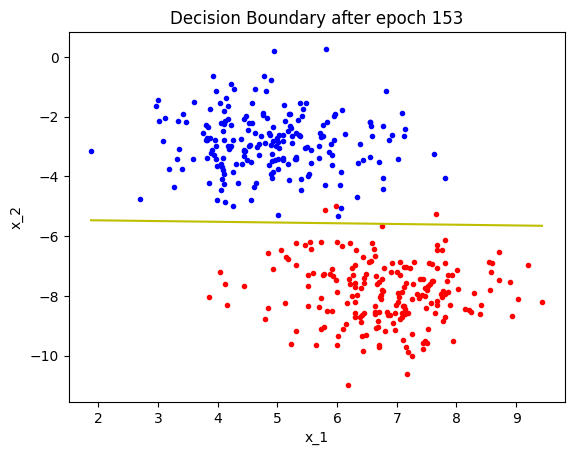

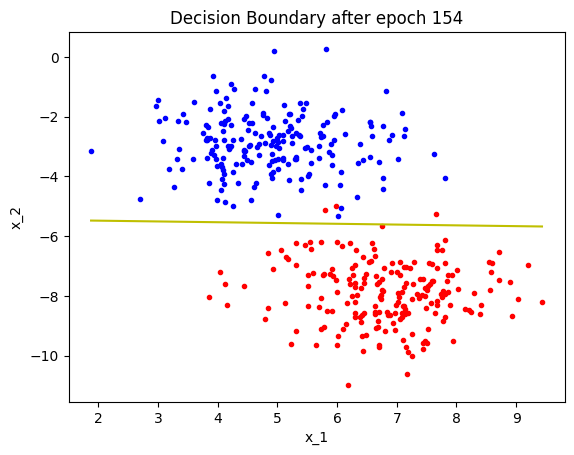

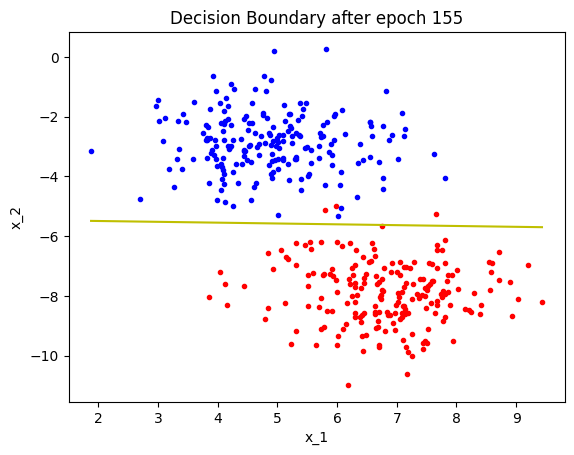

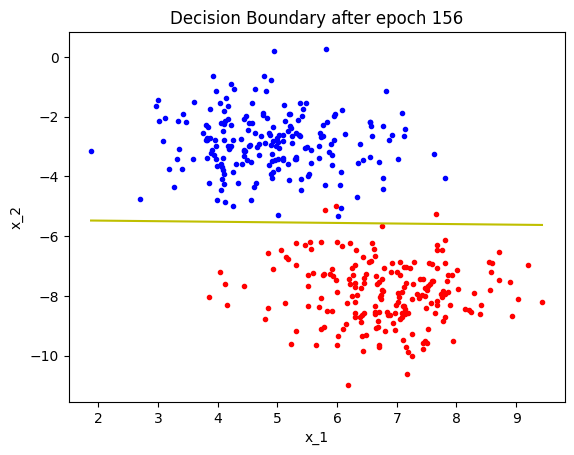

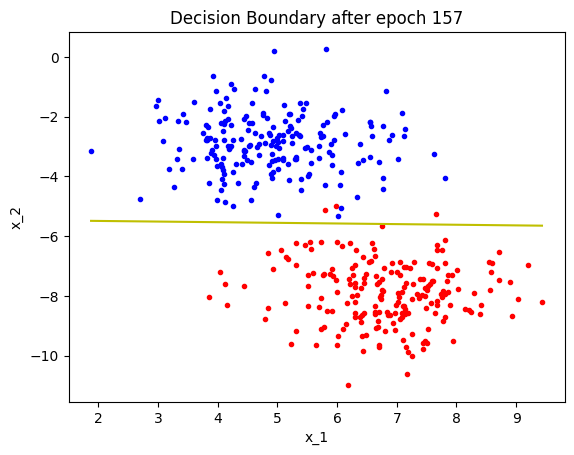

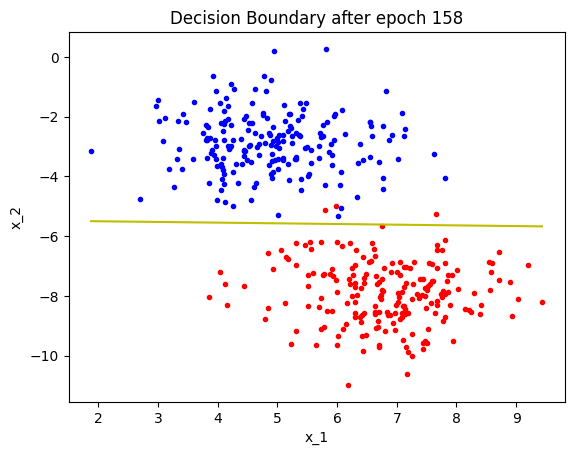

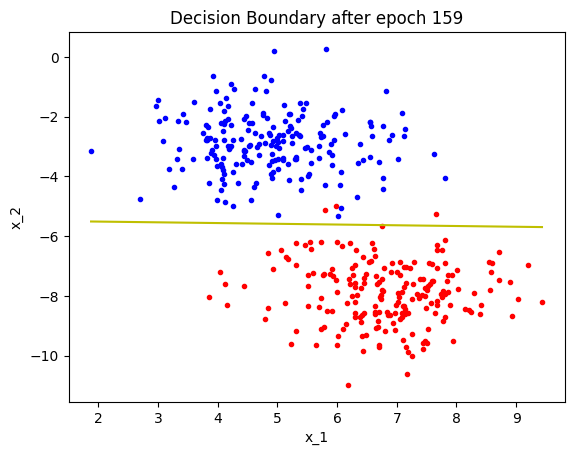

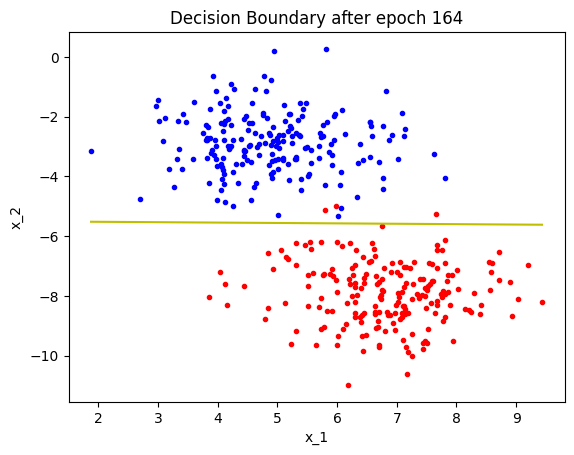

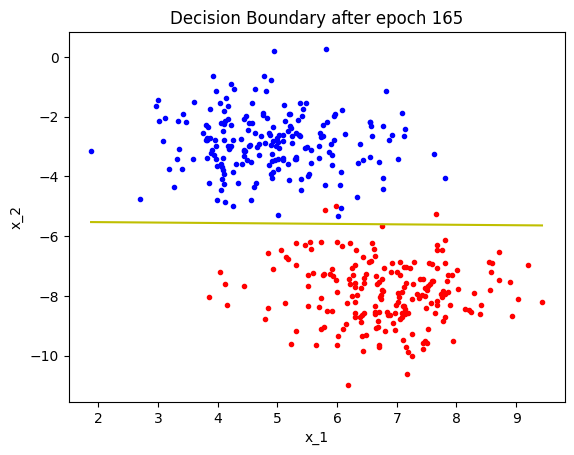

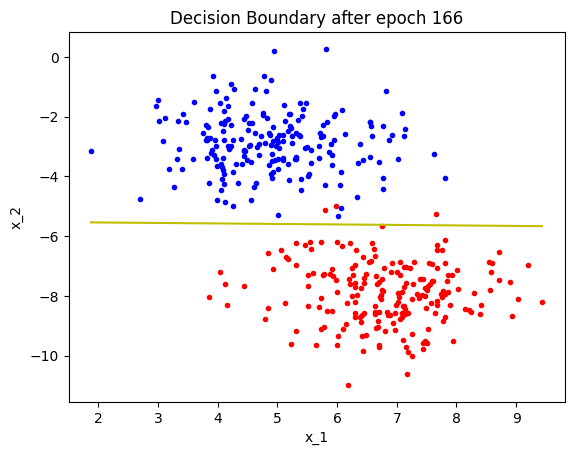

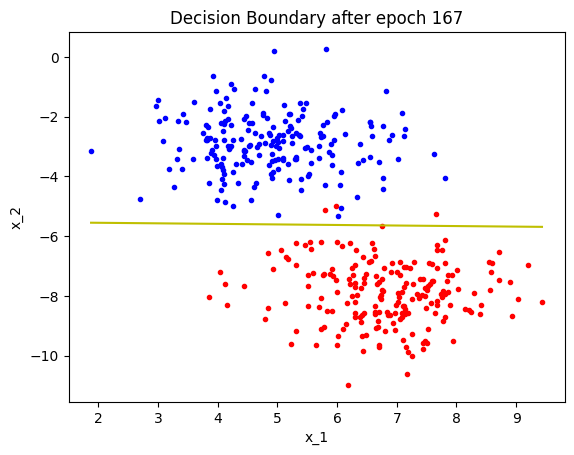

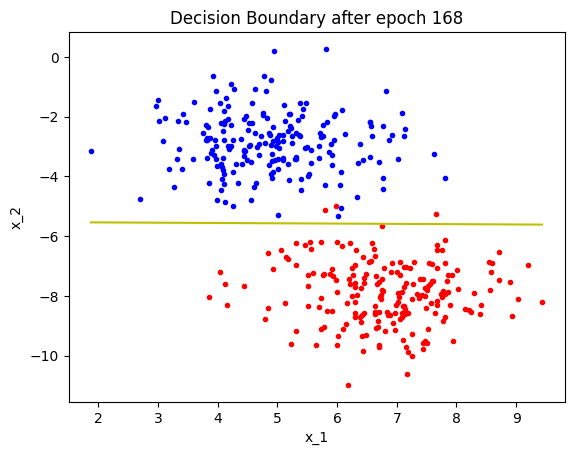

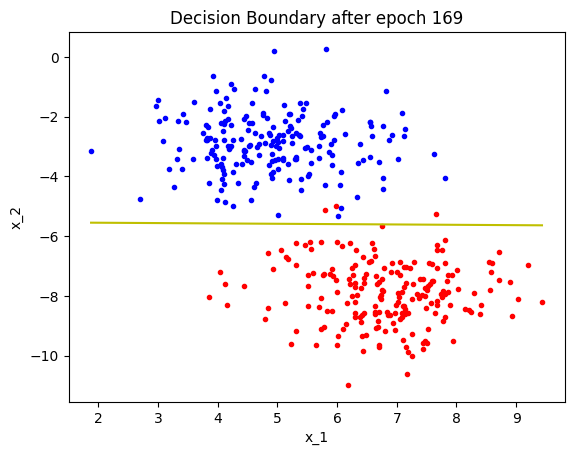

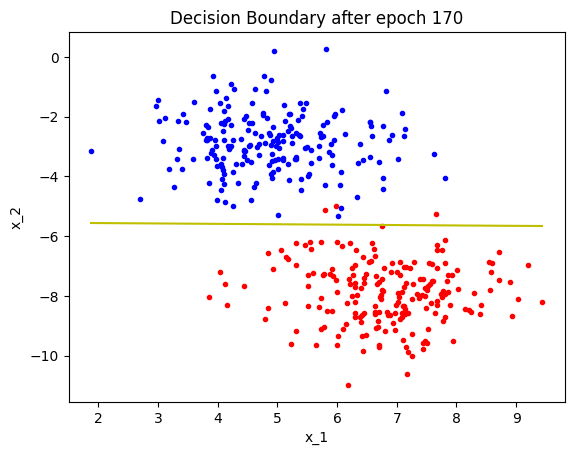

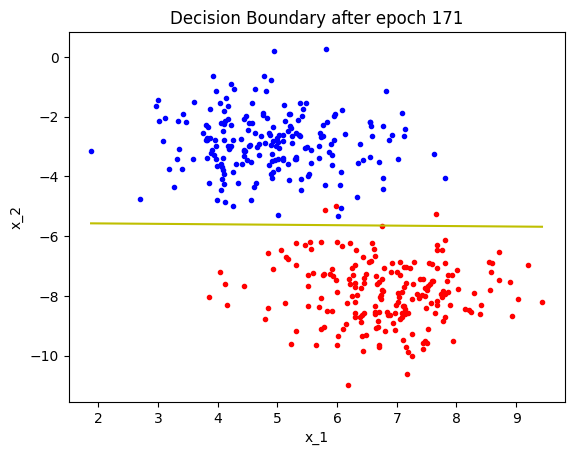

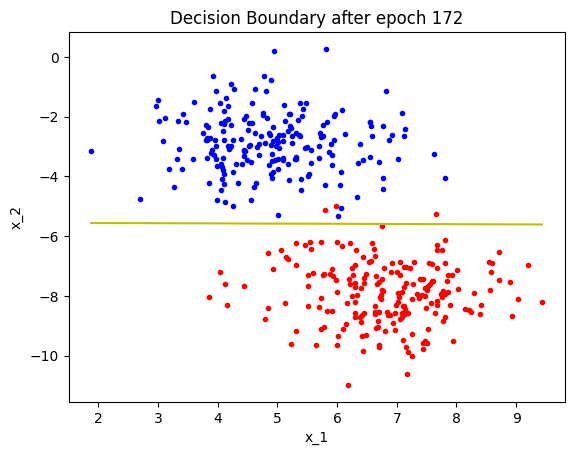

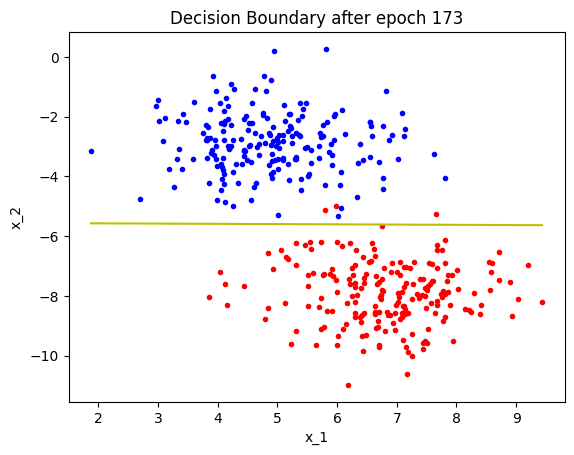

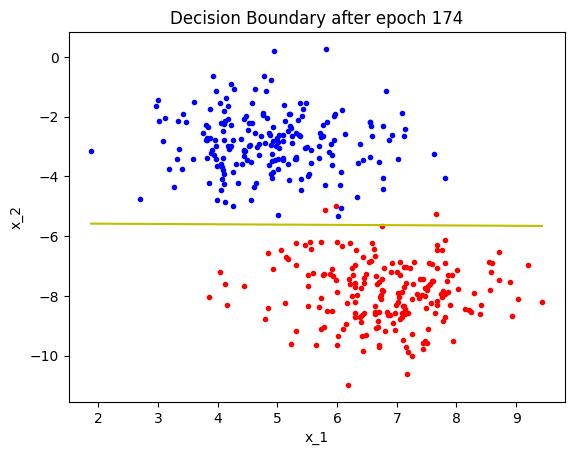

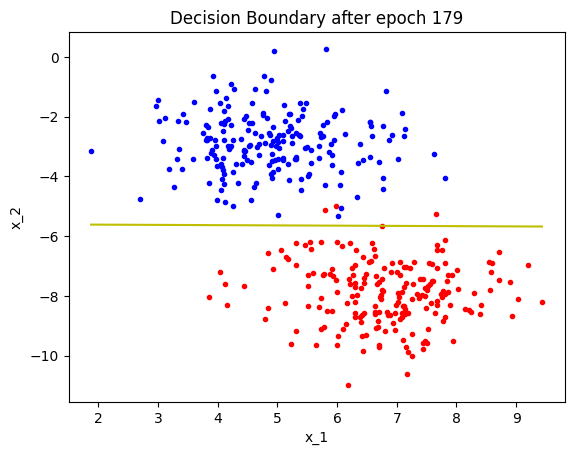

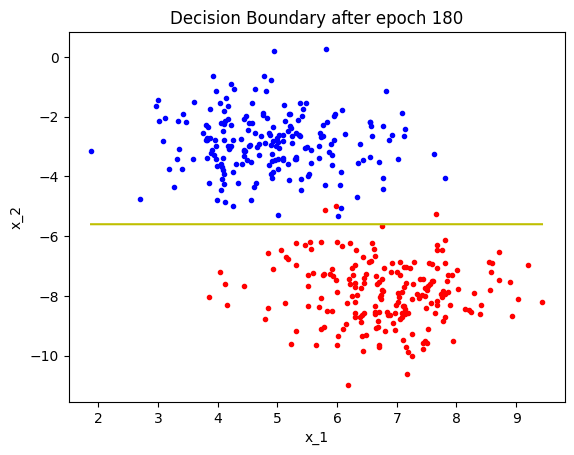

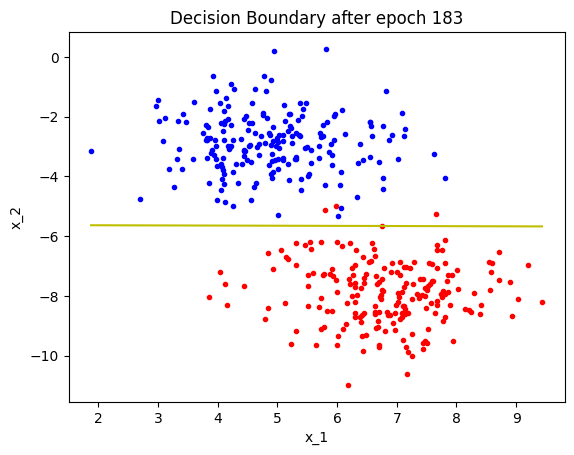

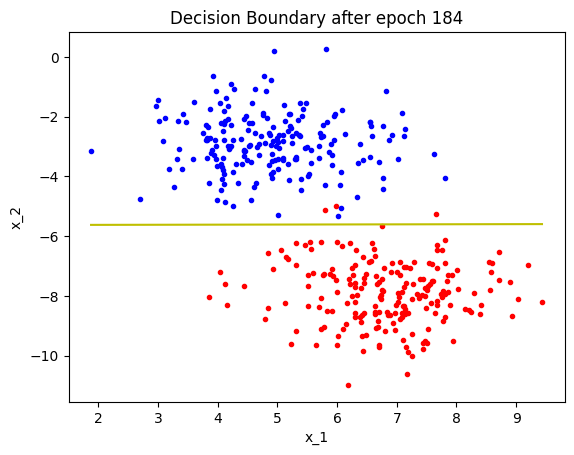

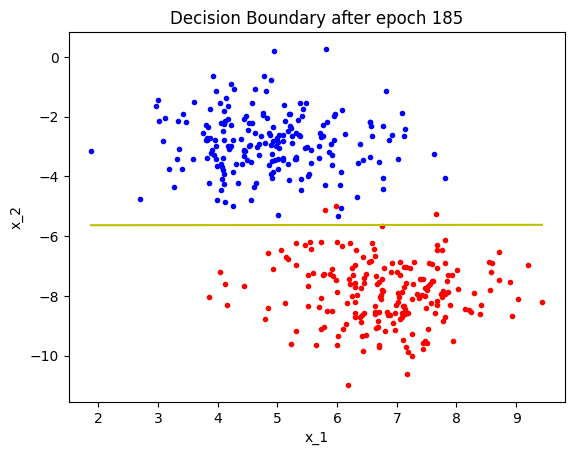

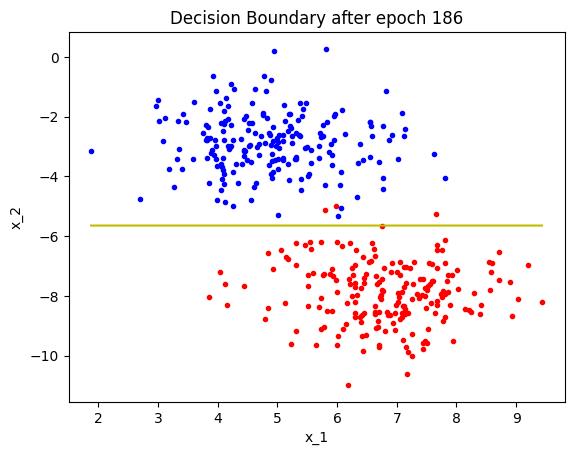

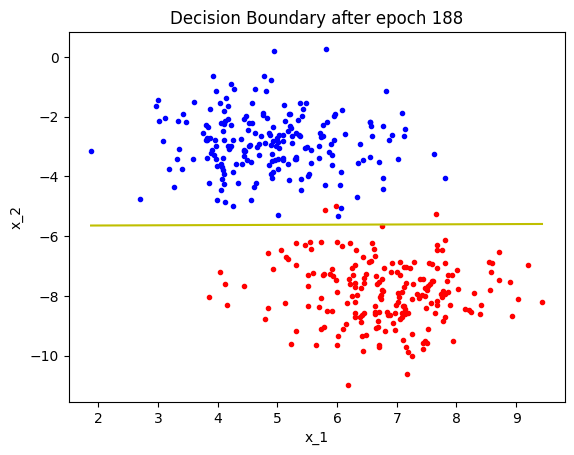

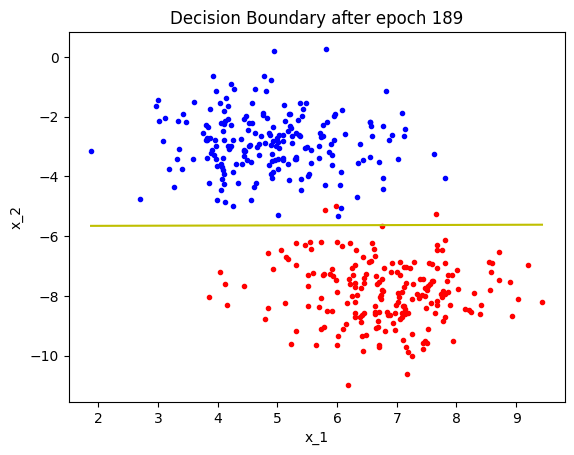

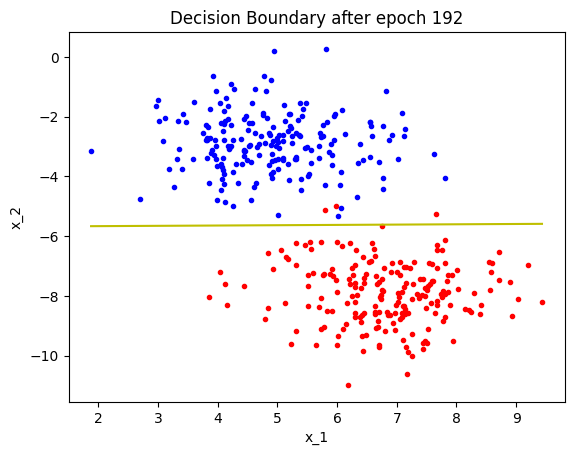

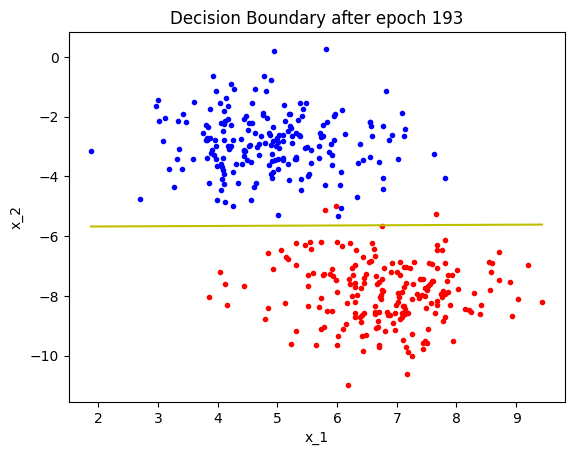

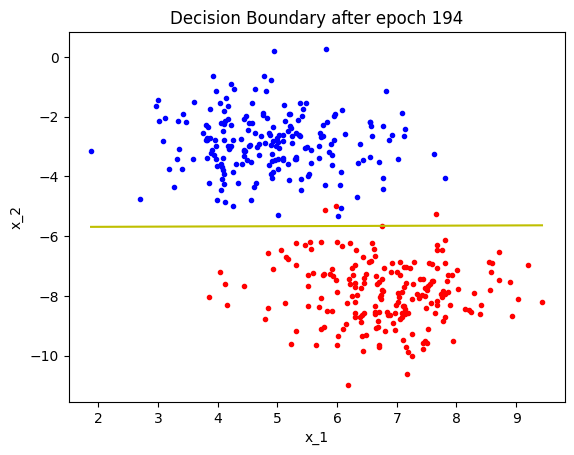

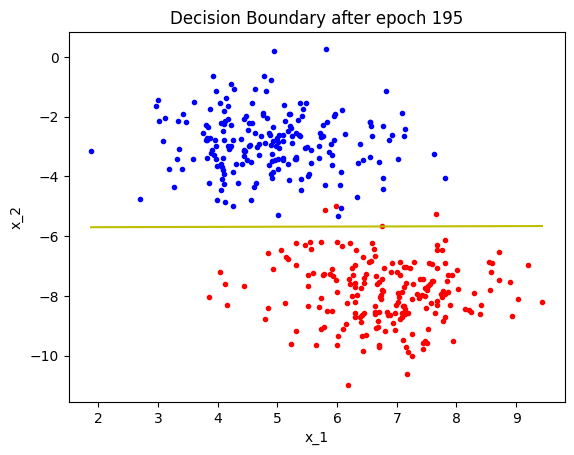

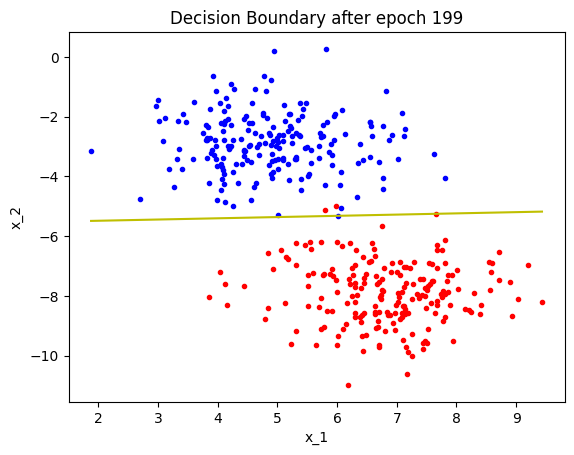

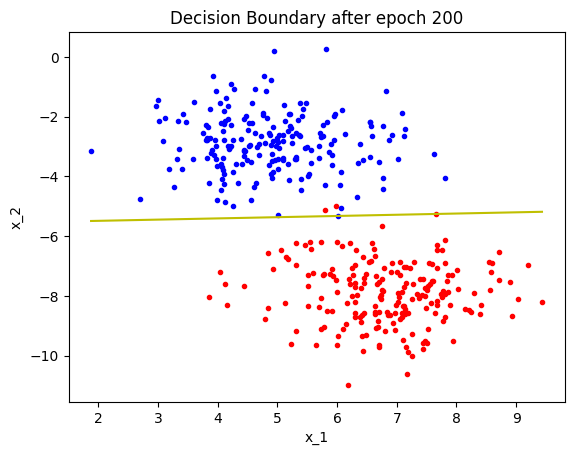

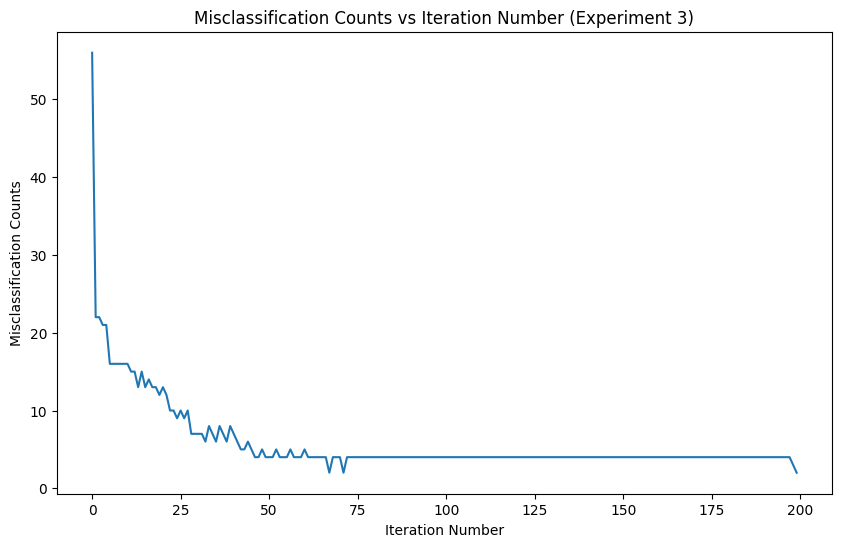

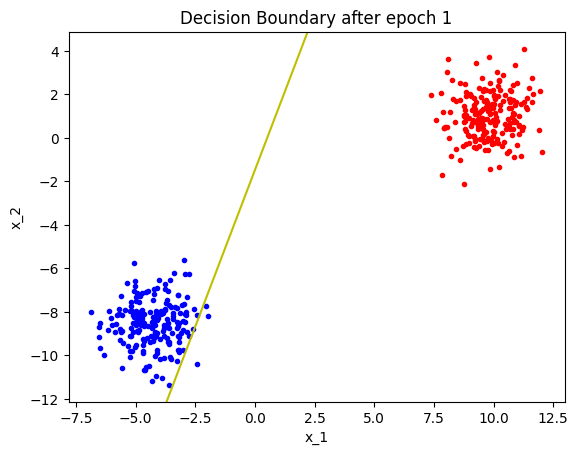

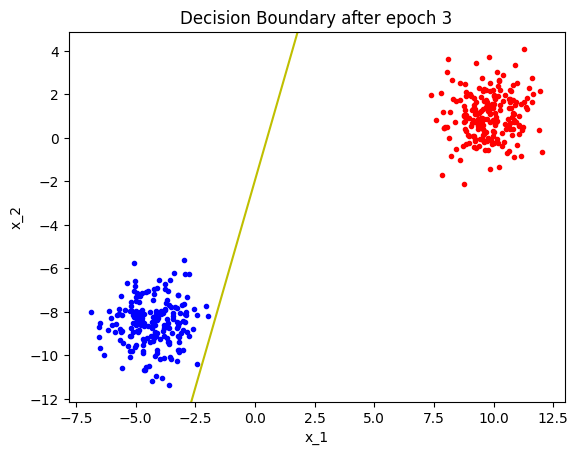

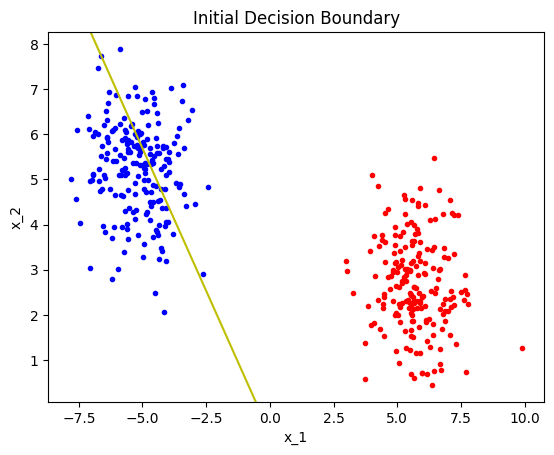

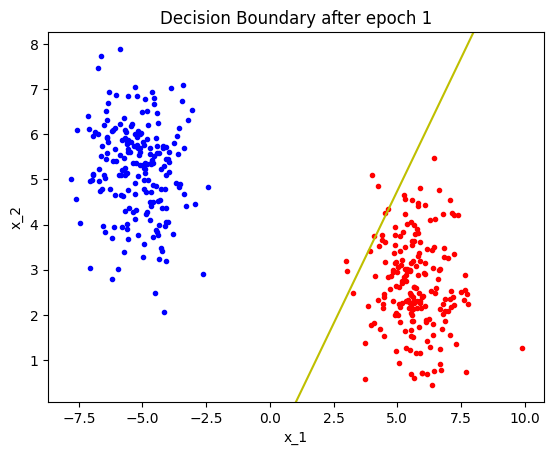

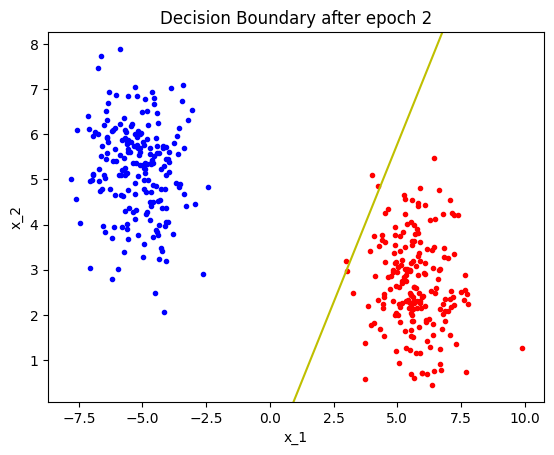

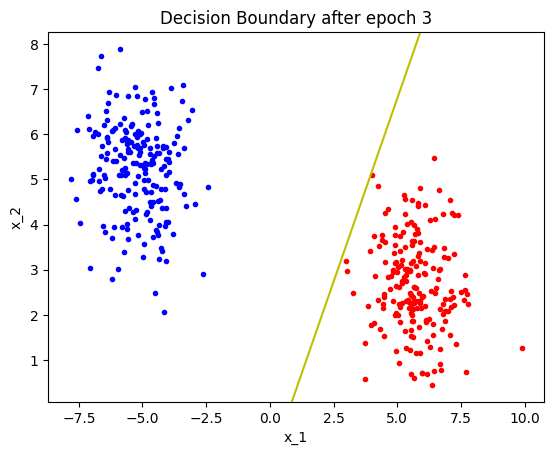

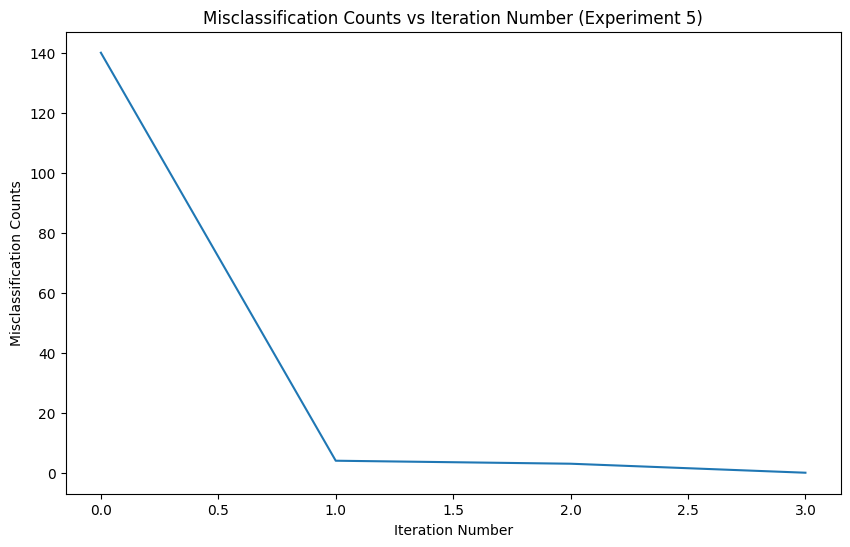

In [ ]:
# Set learning rate and maximum number of epochs
lr = 0.001
max_epochs = 200

# Number of times to run the experiment
num_experiments = 5

for i in range(num_experiments):
    # Generate a new dataset
    X, y = sklearn.datasets.make_blobs(n_samples=500, centers=2, random_state=42+i)
    df = pd.DataFrame(data=X, columns=["x1", "x2"])
    df["label"] = y
    df["x0"] = 1.0
    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(df[["x0", "x1", "x2"]], df["label"], test_size=0.2, random_state=42)

    # Run perceptron training
    miss_list, wh_final = perceptron_train(X_train, y_train, lr, max_epochs)

    # Plot misclassification counts versus iteration number
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(miss_list)), miss_list)
    plt.title(f"Misclassification Counts vs Iteration Number (Experiment {i+1})")
    plt.xlabel("Iteration Number")
    plt.ylabel("Misclassification Counts")
    plt.show()
